In [ ]:
import pandas as pd
import numpy as np
import xgboost as xg
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from keras.models import Sequential
from keras.layers import Dense,Dropout, BatchNormalization
from sklearn.preprocessing import MinMaxScaler

fields = ['Test_dataset', 'Classifier', 'F1', 'G-mean', 'Accuracy', 'Precision', 'Recall','ROC_AUC','PR_AUC','Balanced_Accuracy','CWA']
resamplings = ['None', 'SMOTE', 'NearMiss',
       'SMOTEENN', 'Randomoversampling', 'ADASYN', 'BorderlineSMOTE',
       'SVMSMOTE', 'RandomUnderSampler', 'ClusterCentroids',
       'NearMissversion1', 'NearMissversion2', 'NearMissversion3',
       'TomekLinks', 'EditedNearestNeighbours',
       'RepeatedEditedNearestNeighbours', 'AllKNN',
       'CondensedNearestNeighbour', 'NeighbourhoodCleaningRule',
       'InstanceHardnessThreshold', 'SMOTETomek']
df = pd.read_csv("C:/Ronald/uOttawa/CSI 6900/Metallic-main/Metafeature/features.csv")
dataset_names=list(df['Dataset'])
# names=np.unique(dataset_names)
names = ["BreastCancer"]
results_df = pd.DataFrame(columns=['Classifier', 'Dataset', 'Resamplings', 'Metric', 'Predictions', 'Actual'])
for j in ['KNN','DT','GNB','SVM','RF','GB','ADA','CAT']:
    for i in names:
        print(i)
        for metric in ['F1','G-mean','Accuracy','Precision','Recall','AUC-ROC','AUC-PR','BalancedAccuracy','CWA']:
            dataframe = df[df['Dataset'] != i]
            x_test_sample = df[df['Dataset'] == i]
            x_test_selected = x_test_sample[x_test_sample[j] == 1]
            y_test = np.array(x_test_selected[metric])
            x_test = x_test_selected.iloc[:, 1:50]
            x_test_sample=x_test.iloc[:,28:]
            count1=1
            sample_not_present=[]
            for kk in range(0,21):
                sample1=list(x_test_sample.iloc[:,kk])
                if 1 not in sample1:
                    sample_not_present.append(count1)
                count1=count1+1
            selected_dataframe = dataframe[dataframe[j] == 1]
            y_train = np.array(selected_dataframe[metric])
            x_train = selected_dataframe.iloc[:, 1:50]
            xgb = xg.XGBRegressor(objective ='reg:squarederror',colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3,
                                        min_child_weight=1.5,n_estimators=10000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, seed=42)

            x_train = np.array(x_train)
            y_train[np.isnan(y_train)] = 0
            xgb.fit(np.array(x_train), y_train)

            y_pred_xgb = list(xgb.predict(np.array(x_test)))
            if len(y_pred_xgb) != 21:
                for ii in sample_not_present:
                    y_pred_xgb.insert(int(ii)-1,0)

            y_pred_xgb = pd.DataFrame(y_pred_xgb)

            y_test=list(y_test)
            if len(y_test)!=21:
                for ij in sample_not_present:
                    y_test.insert(int(ij)-1,0)
            y_test=pd.DataFrame(y_test)

            temp_df = pd.DataFrame({
                    'Classifier': [j]*len(y_test),
                    'Dataset': [i]*len(y_test),
                    'Resamplings': resamplings,
                    'Metric': [metric]*len(y_test),  
                    'Predictions': y_pred_xgb.squeeze().to_list(),
                    'Actual':y_test.squeeze().to_list()
                    })
            results_df = pd.concat([results_df, temp_df], ignore_index=True)

results_df.to_csv('./result.csv')

In [54]:
results_df

Classifier       Dataset                Resamplings Metric  Predictions  \
0           KNN  BreastCancer                       None     F1     0.894021   
1           KNN  BreastCancer                      SMOTE     F1     0.950015   
2           KNN  BreastCancer                   NearMiss     F1     0.906999   
3           KNN  BreastCancer                   SMOTEENN     F1     0.931084   
4           KNN  BreastCancer         Randomoversampling     F1     0.935456   
...         ...           ...                        ...    ...          ...   
1507        CAT  BreastCancer                     AllKNN    CWA     0.056100   
1508        CAT  BreastCancer  CondensedNearestNeighbour    CWA     0.112414   
1509        CAT  BreastCancer  NeighbourhoodCleaningRule    CWA     0.053721   
1510        CAT  BreastCancer  InstanceHardnessThreshold    CWA     0.063957   
1511        CAT  BreastCancer                 SMOTETomek    CWA     0.066510   

        Actual  
0     0.940238  
1     0.974130  
2     0.939651  
3     0.996466  
4     0.969750  
...        ...  
1507  0.076090  
1508  0.057516  
1509  0.066212  
1510  0.109906  
1511  0.058005  

[1512 rows x 6 columns]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
resamplings = ['None', 'SMOTE', 'NearMiss',
       'SMOTEENN', 'Randomoversampling', 'ADASYN', 'BorderlineSMOTE',
       'SVMSMOTE', 'RandomUnderSampler', 'ClusterCentroids',
       'NearMissversion1', 'NearMissversion2', 'NearMissversion3',
       'TomekLinks', 'EditedNearestNeighbours',
       'RepeatedEditedNearestNeighbours', 'AllKNN',
       'CondensedNearestNeighbour', 'NeighbourhoodCleaningRule',
       'InstanceHardnessThreshold', 'SMOTETomek']

In [4]:
results_df = pd.read_csv('./result.csv')

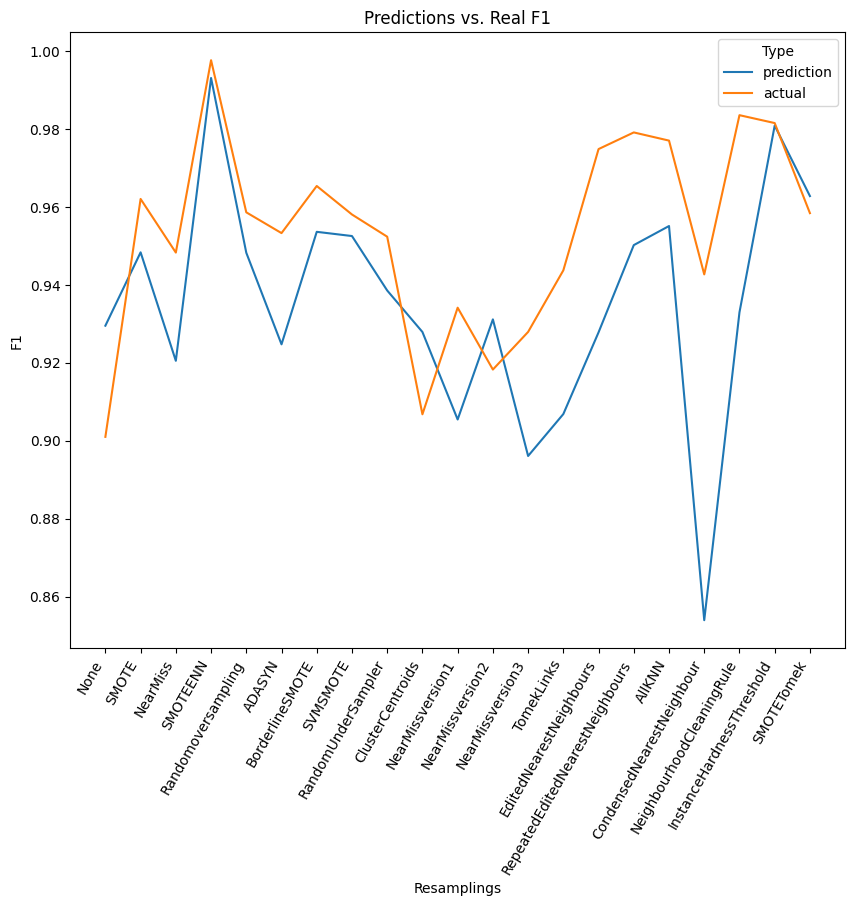

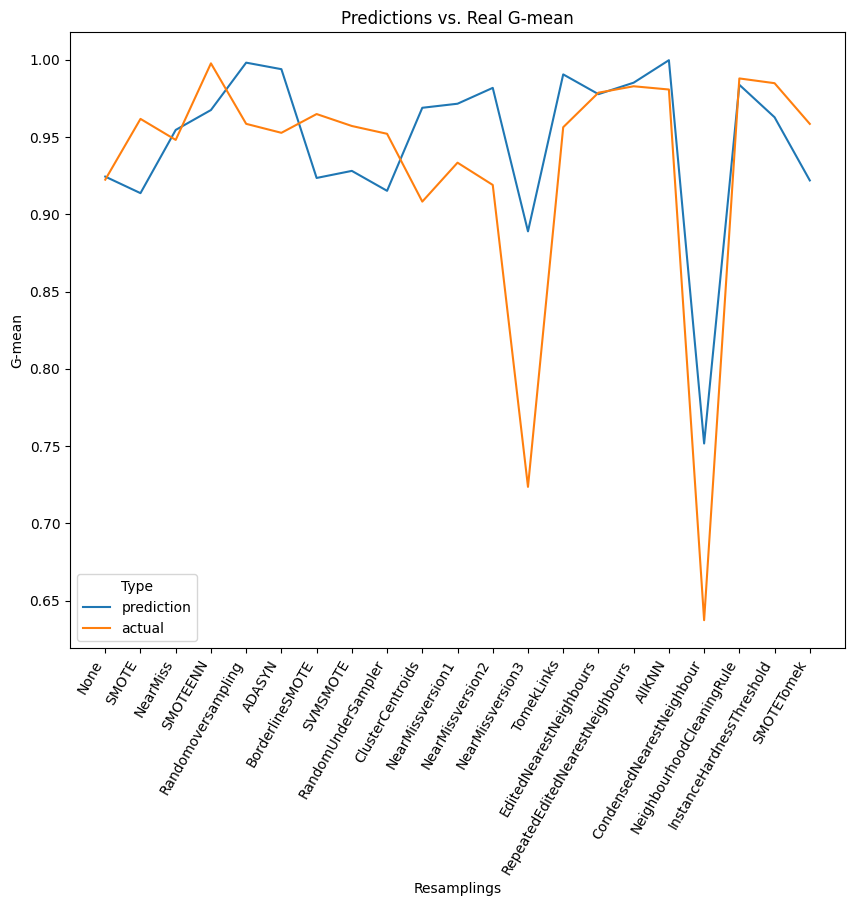

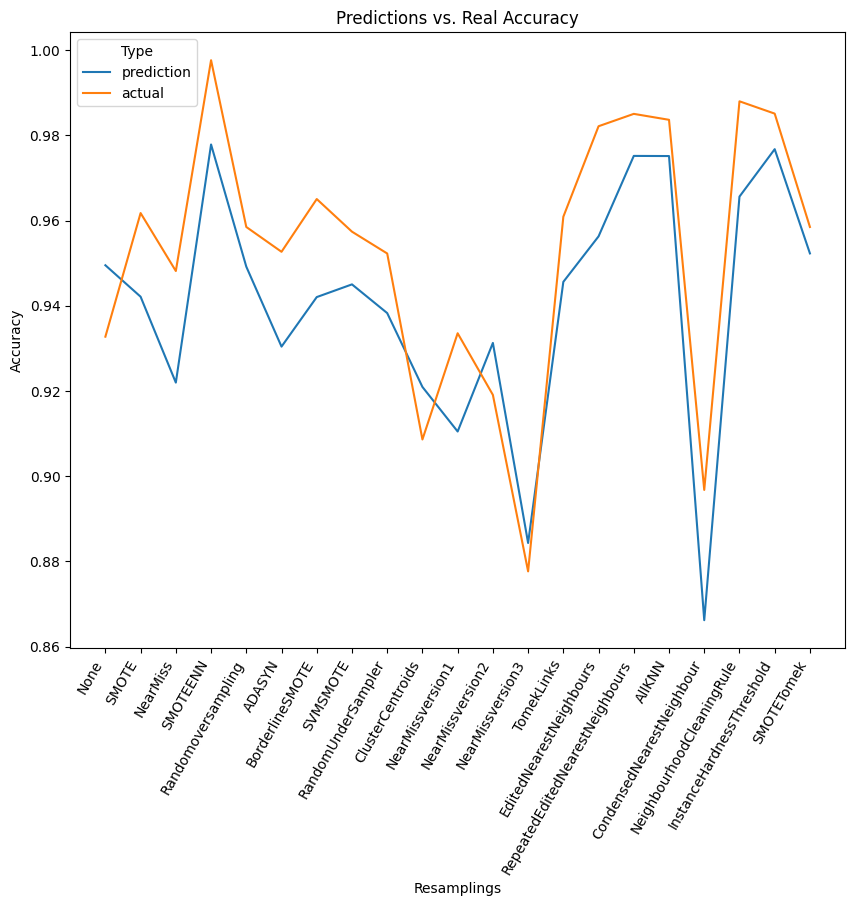

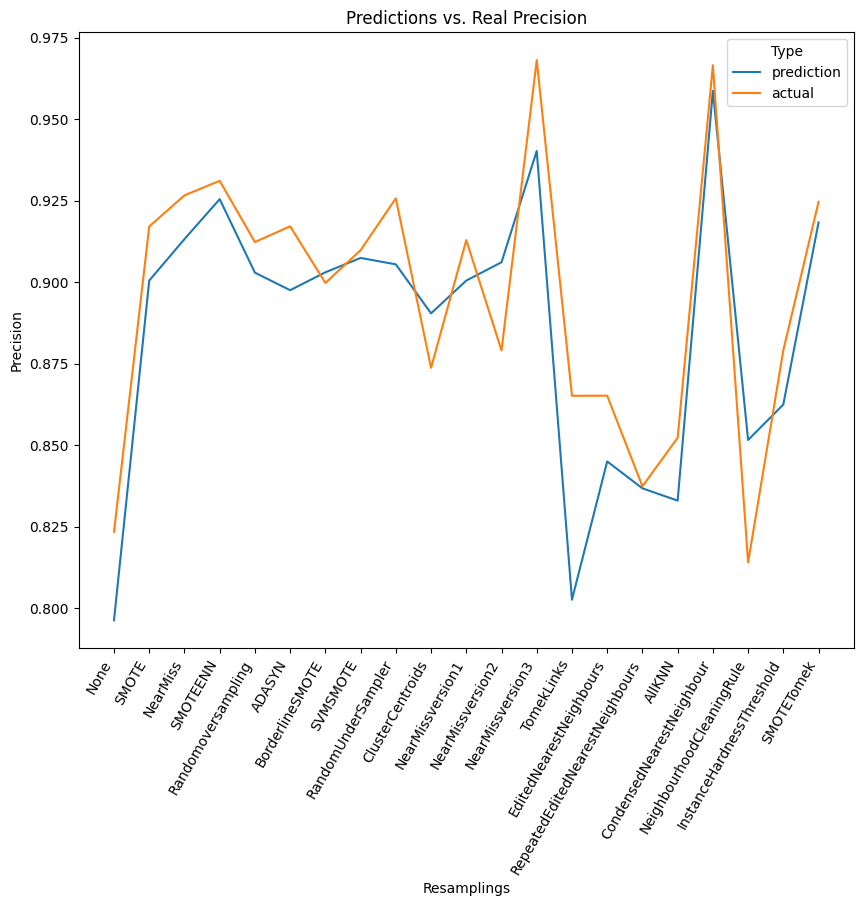

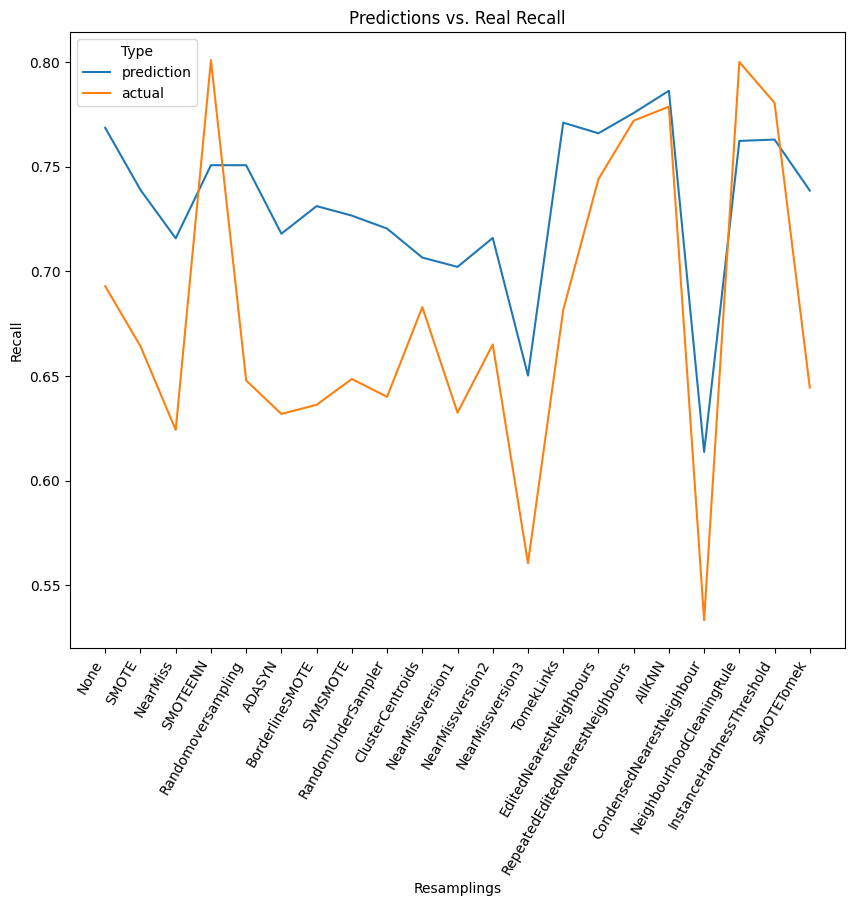

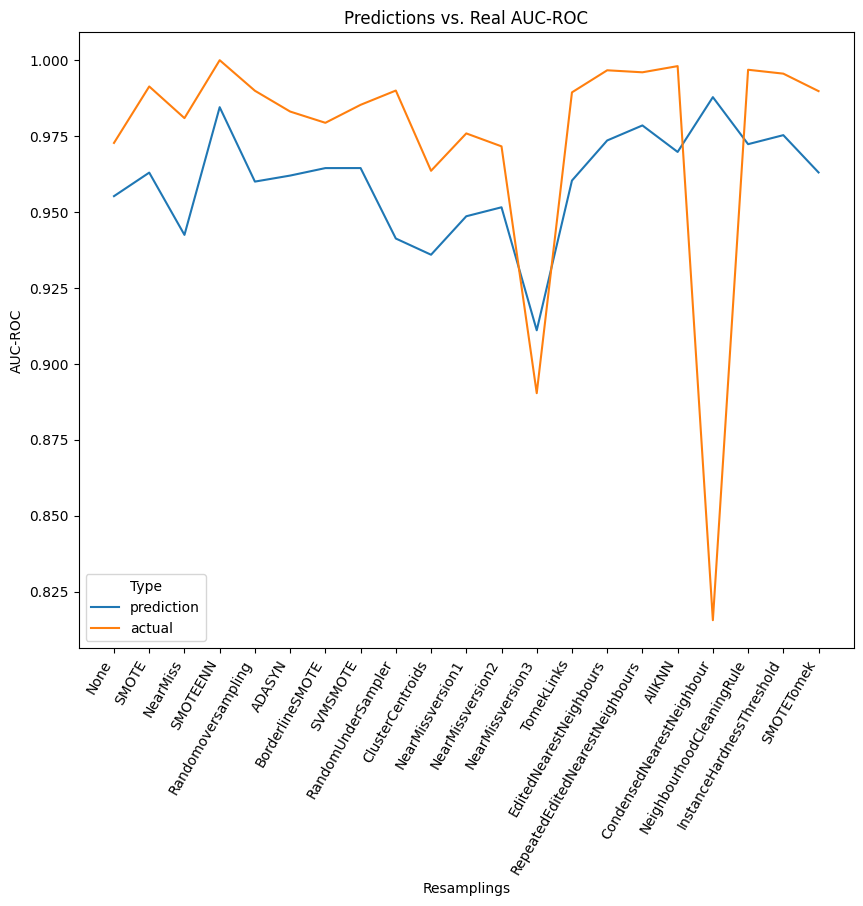

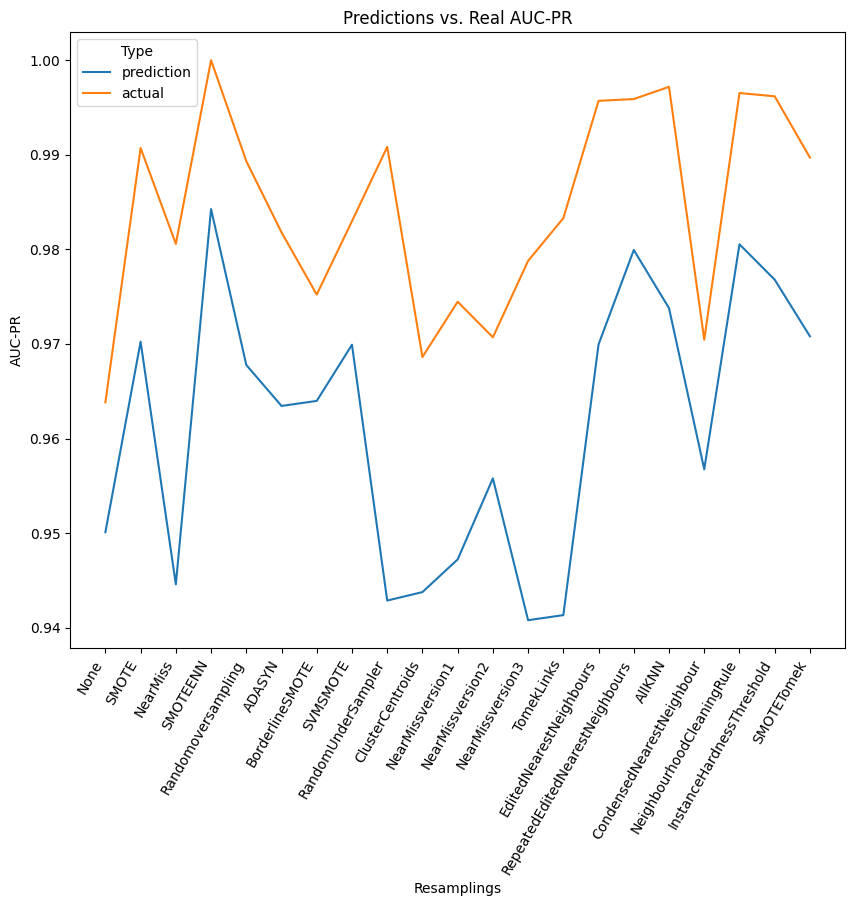

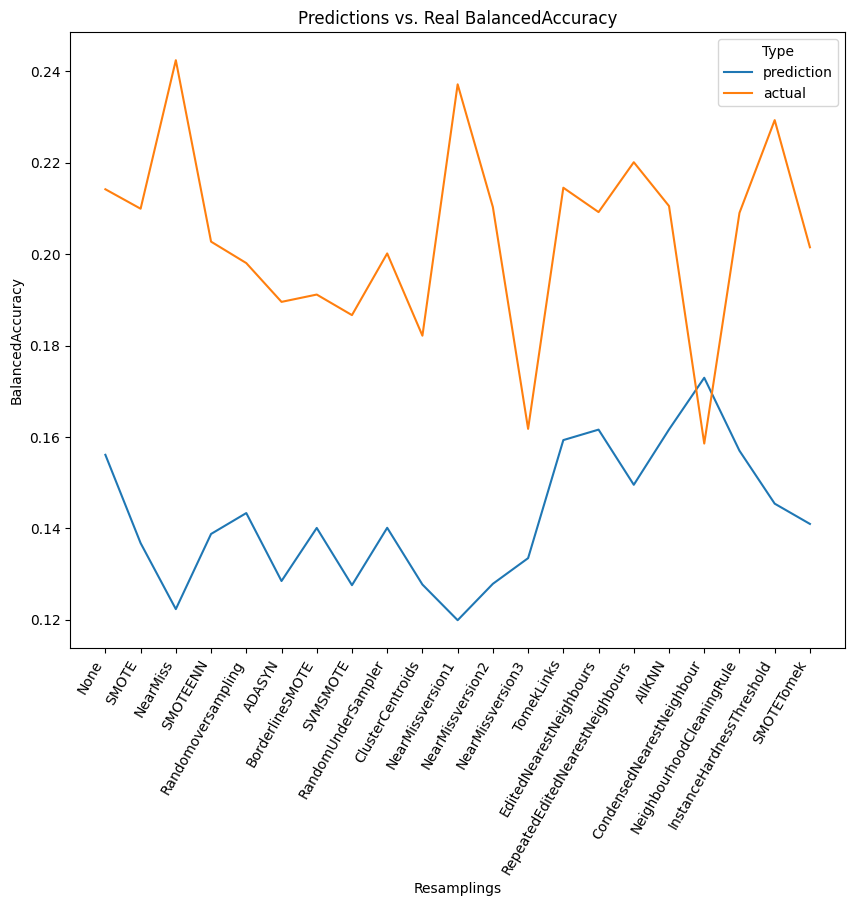

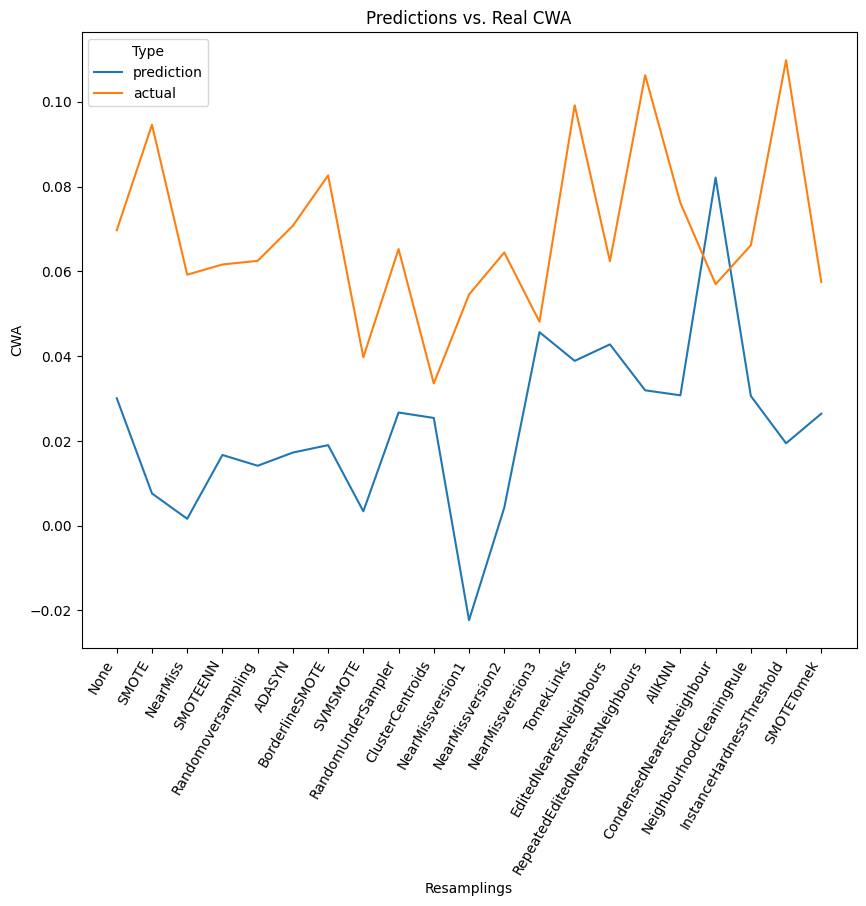

In [5]:
metrics = ['F1','G-mean','Accuracy','Precision','Recall','AUC-ROC','AUC-PR','BalancedAccuracy','CWA']
Classifier = 'ADA'
for metric in metrics:
    predictions = results_df[(results_df['Classifier'] == Classifier)&(results_df['Metric'] == metric)]['Predictions']
    actual = results_df[(results_df['Classifier'] == Classifier)&(results_df['Metric'] == metric)]['Actual']
    plt.figure(figsize=(10, 8))
    plt.plot(resamplings,predictions,label = 'prediction')
    plt.plot(resamplings,actual,label = 'actual')
    plt.title('Predictions vs. Real' + ' ' + metric)
    plt.xlabel('Resamplings')
    plt.ylabel(metric)
    plt.legend(title='Type')
    plt.xticks(rotation=60,fontsize=10,ha='right')
    # plt.tight_layout()
    plt.show()

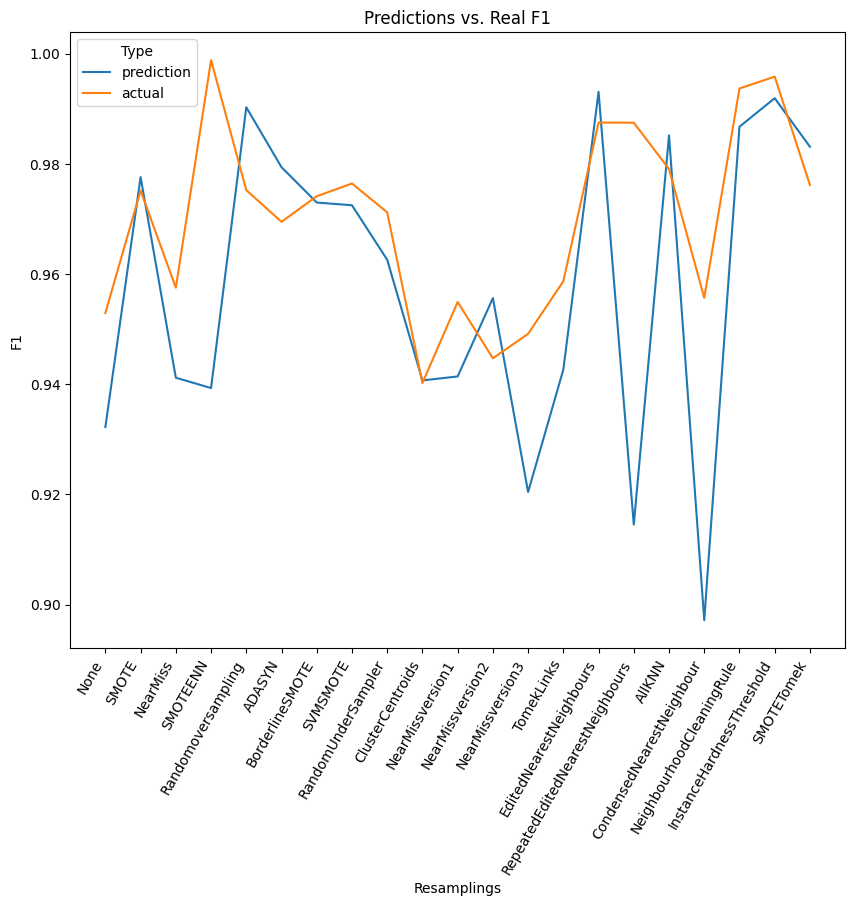

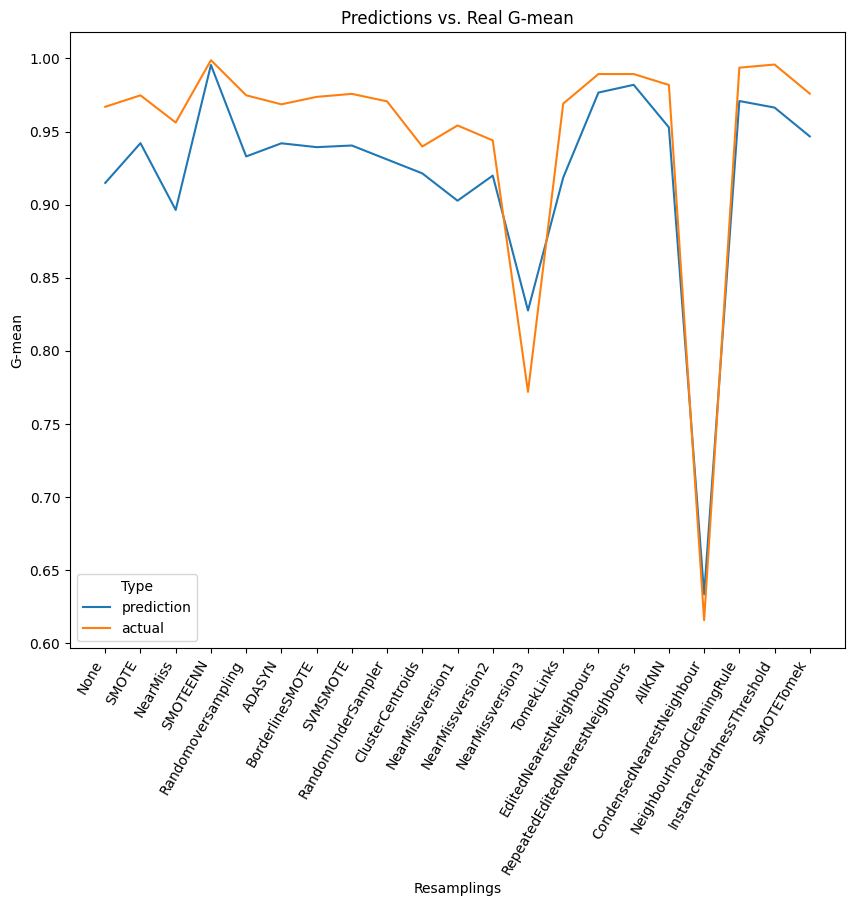

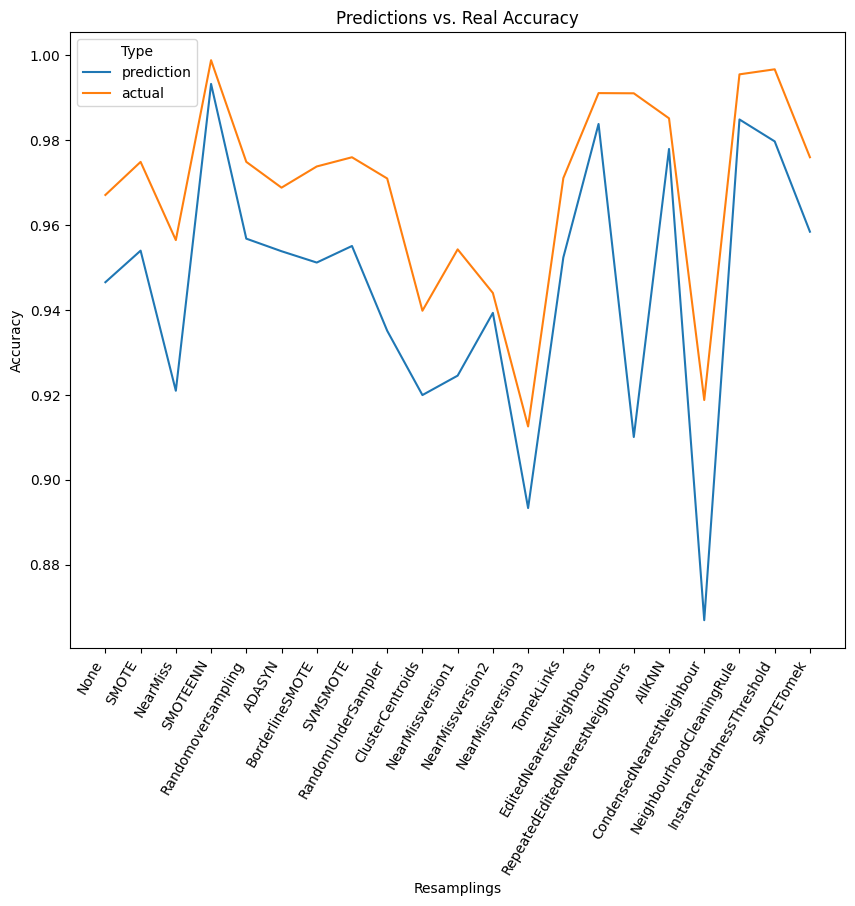

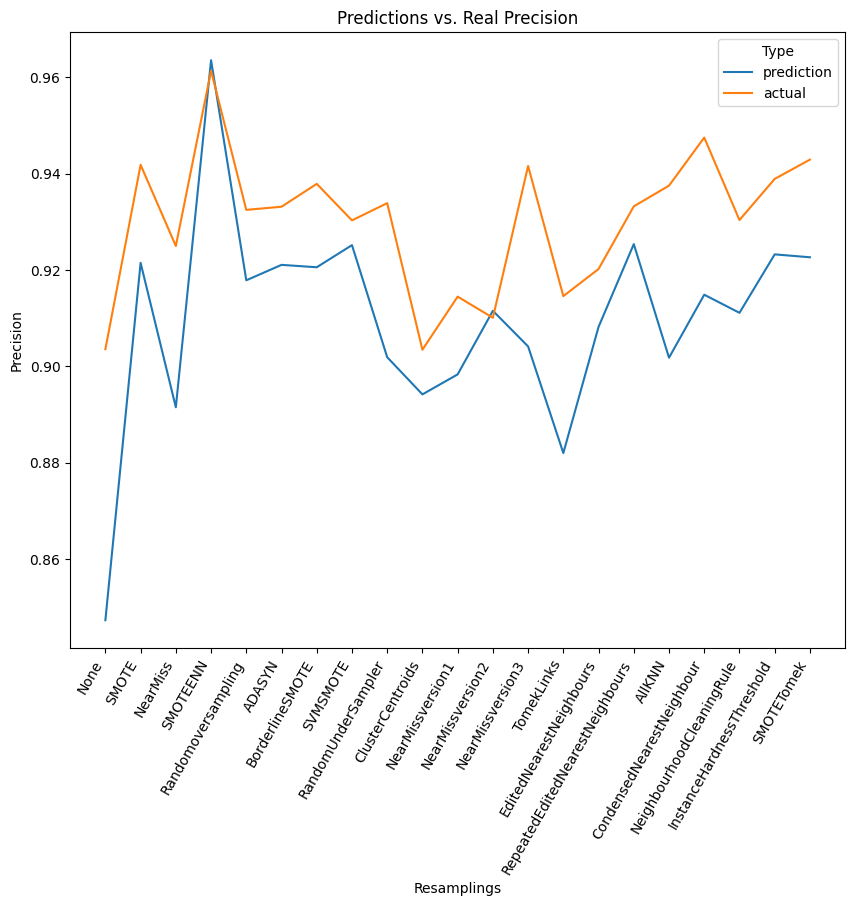

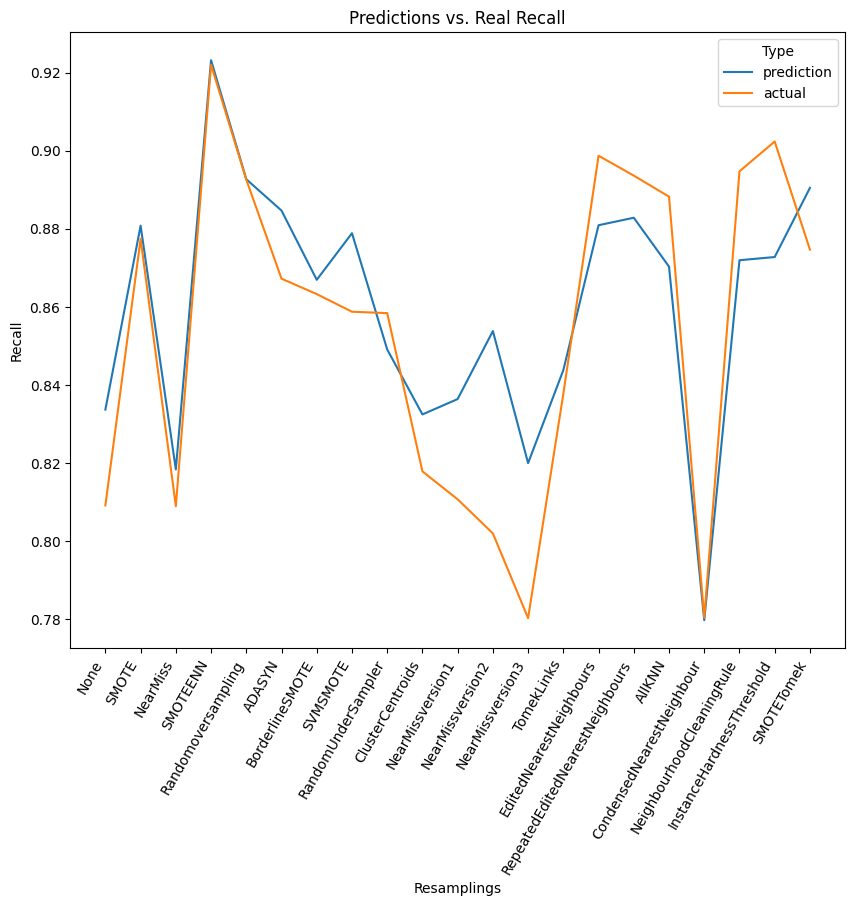

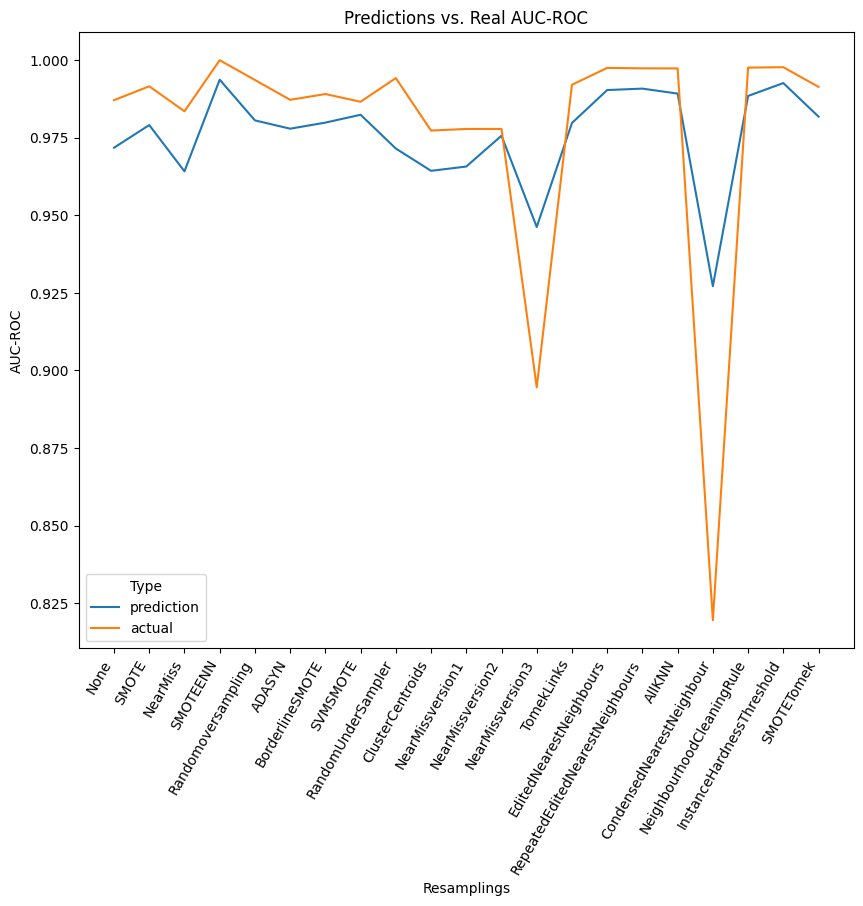

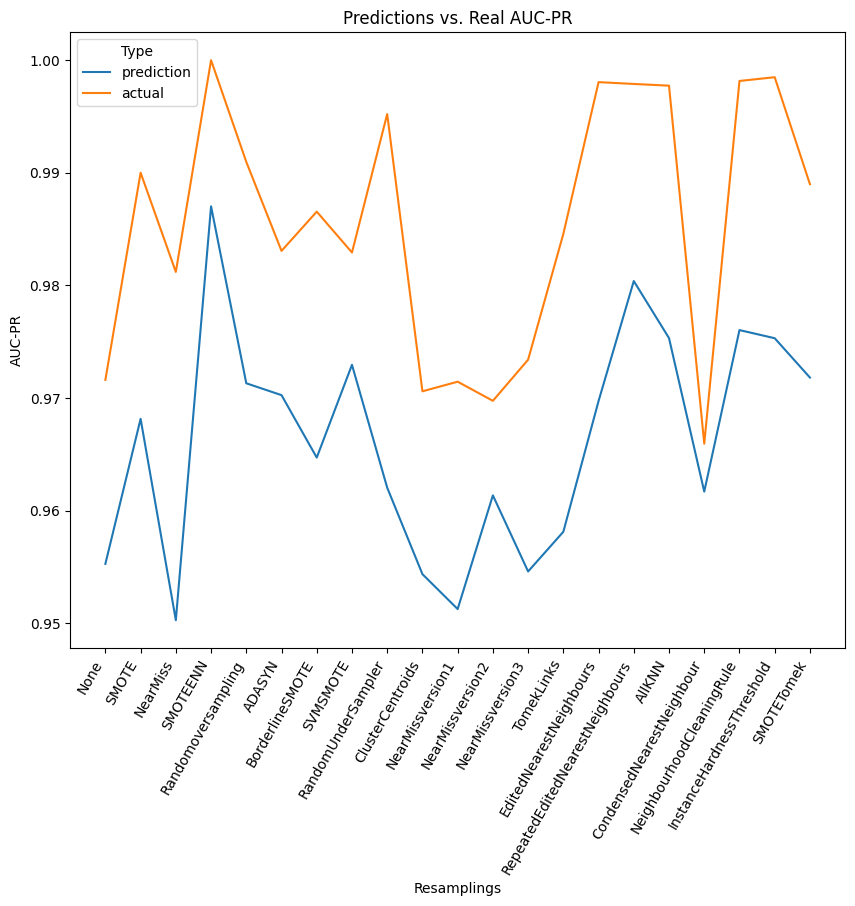

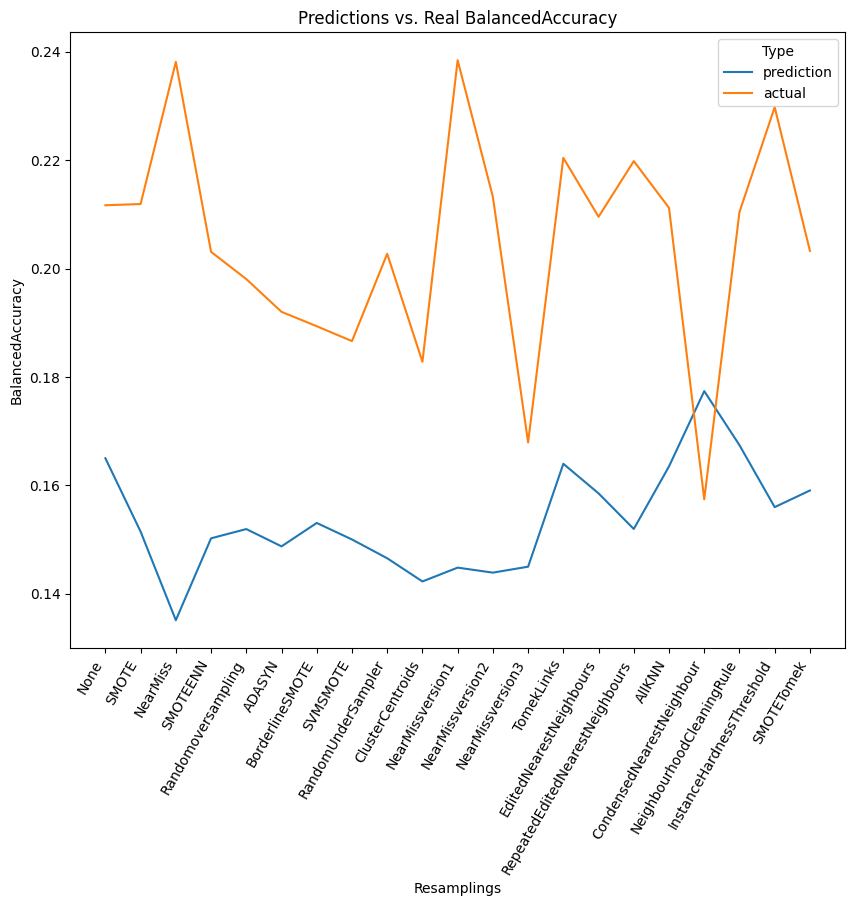

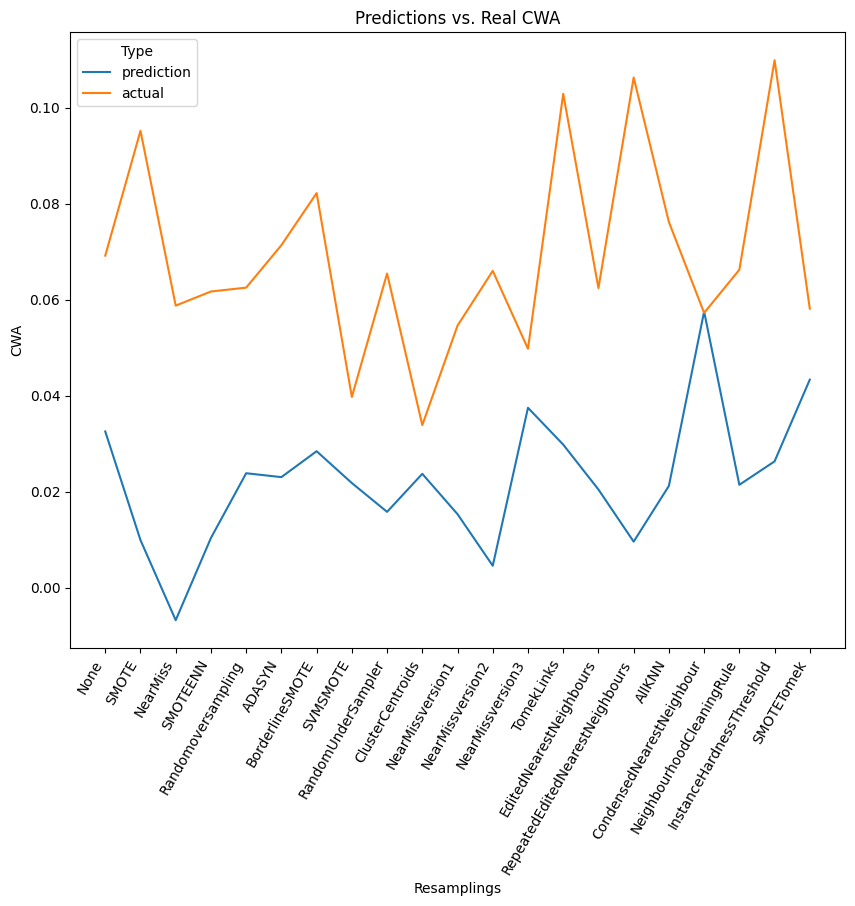

In [6]:
metrics = ['F1','G-mean','Accuracy','Precision','Recall','AUC-ROC','AUC-PR','BalancedAccuracy','CWA']
Classifier = 'RF'
for metric in metrics:
    predictions = results_df[(results_df['Classifier'] == Classifier)&(results_df['Metric'] == metric)]['Predictions']
    actual = results_df[(results_df['Classifier'] == Classifier)&(results_df['Metric'] == metric)]['Actual']
    plt.figure(figsize=(10, 8))
    plt.plot(resamplings,predictions,label = 'prediction')
    plt.plot(resamplings,actual,label = 'actual')
    plt.title('Predictions vs. Real' + ' ' + metric)
    plt.xlabel('Resamplings')
    plt.ylabel(metric)
    plt.legend(title='Type')
    plt.xticks(rotation=60,fontsize=10,ha='right')
    # plt.tight_layout()
    plt.show()

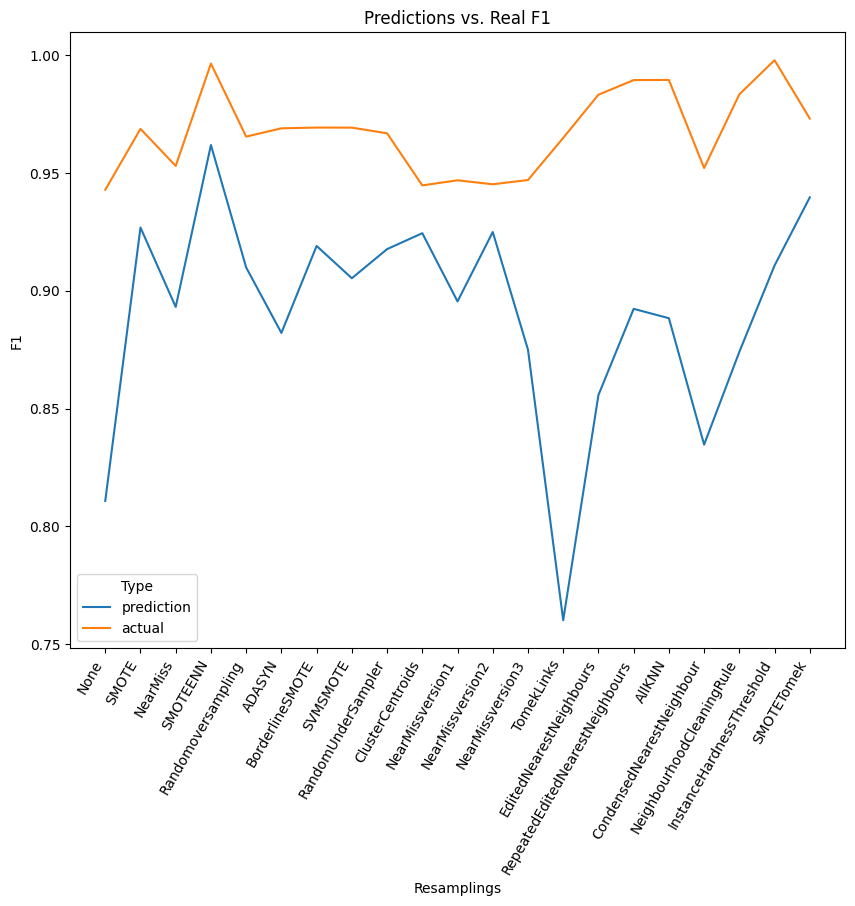

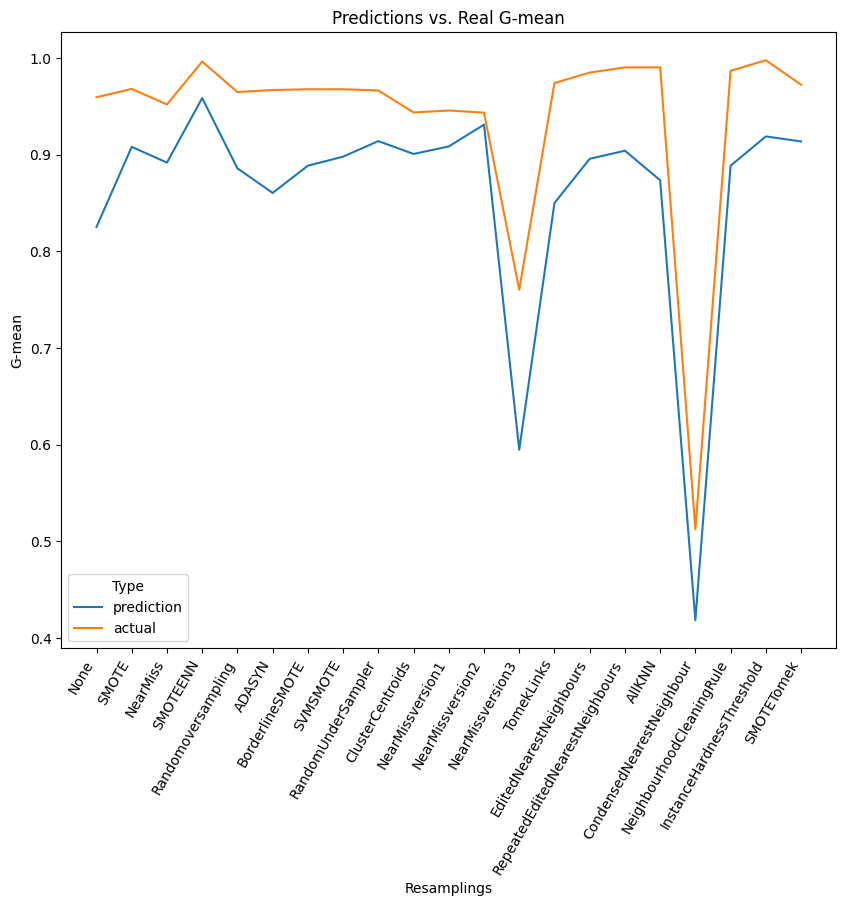

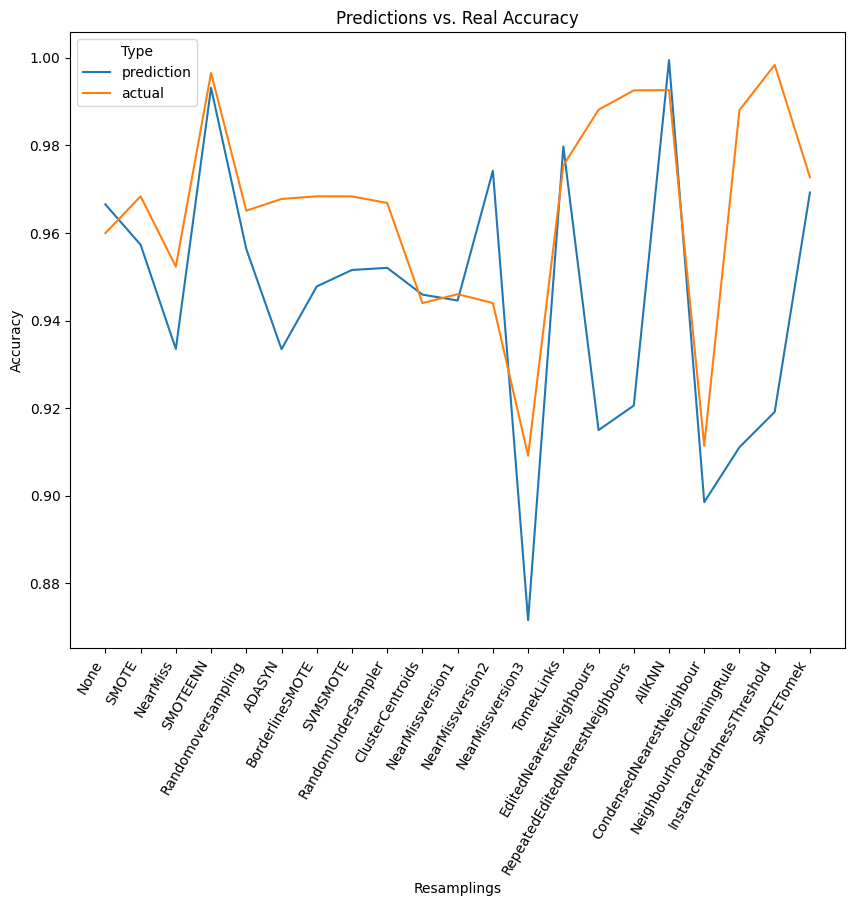

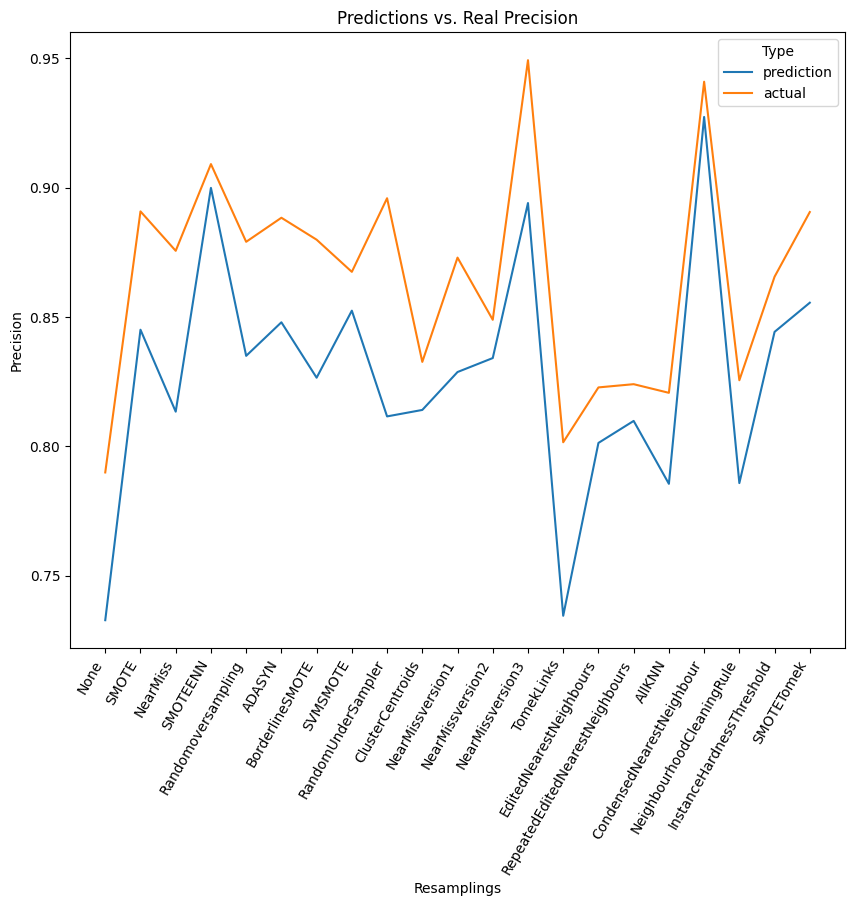

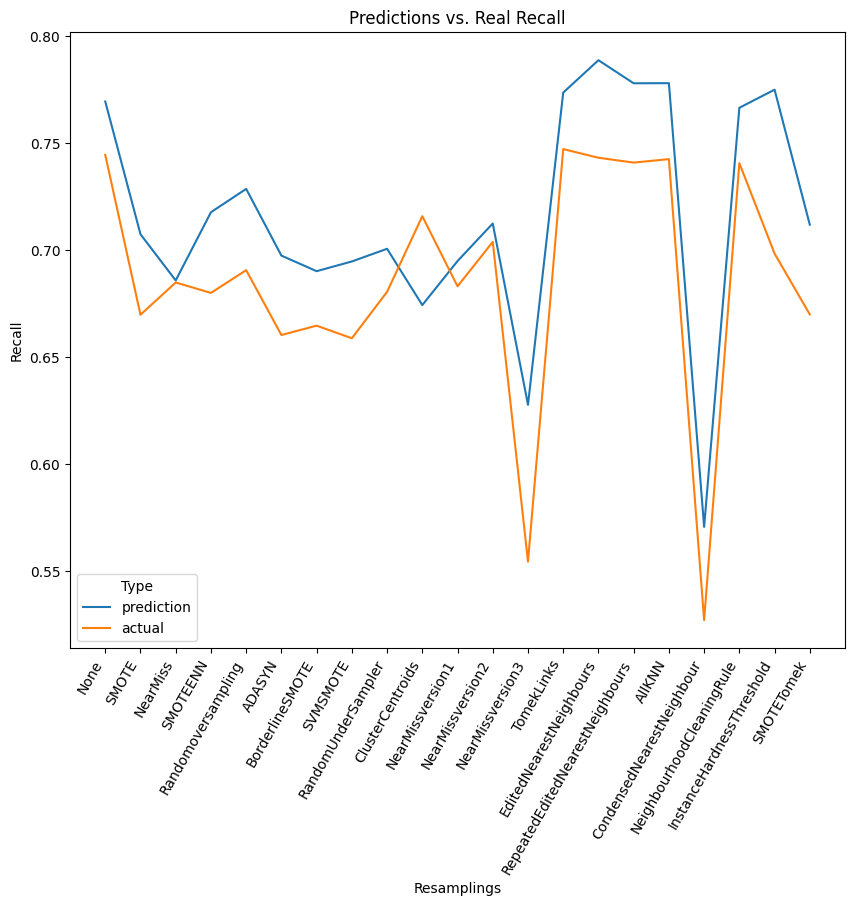

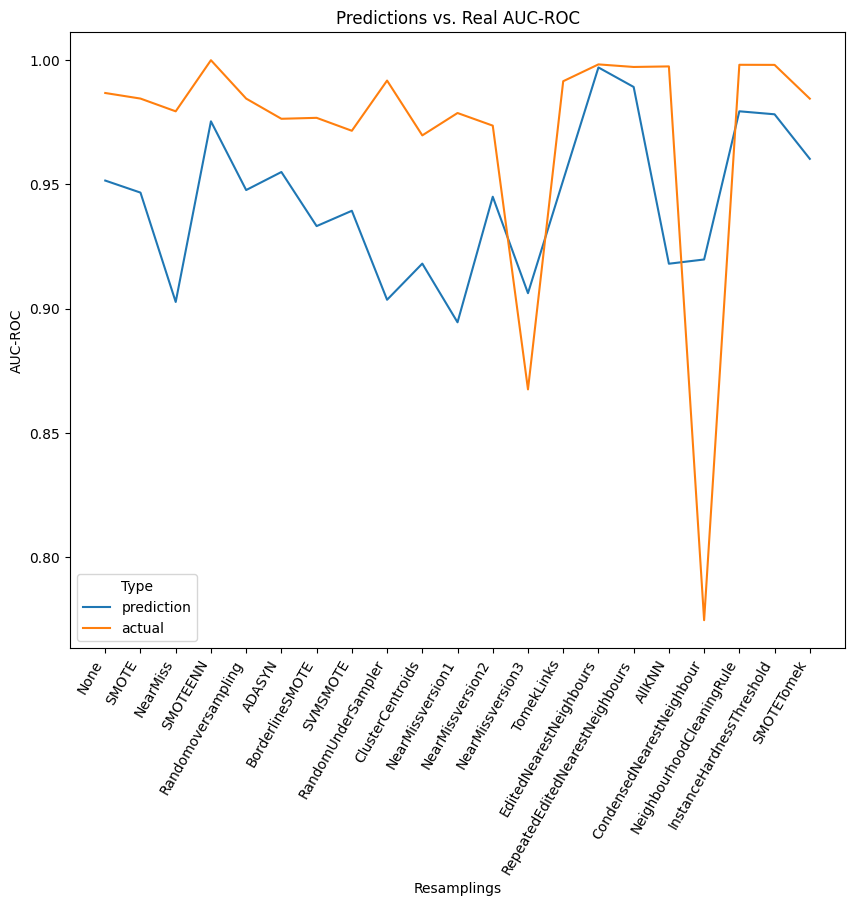

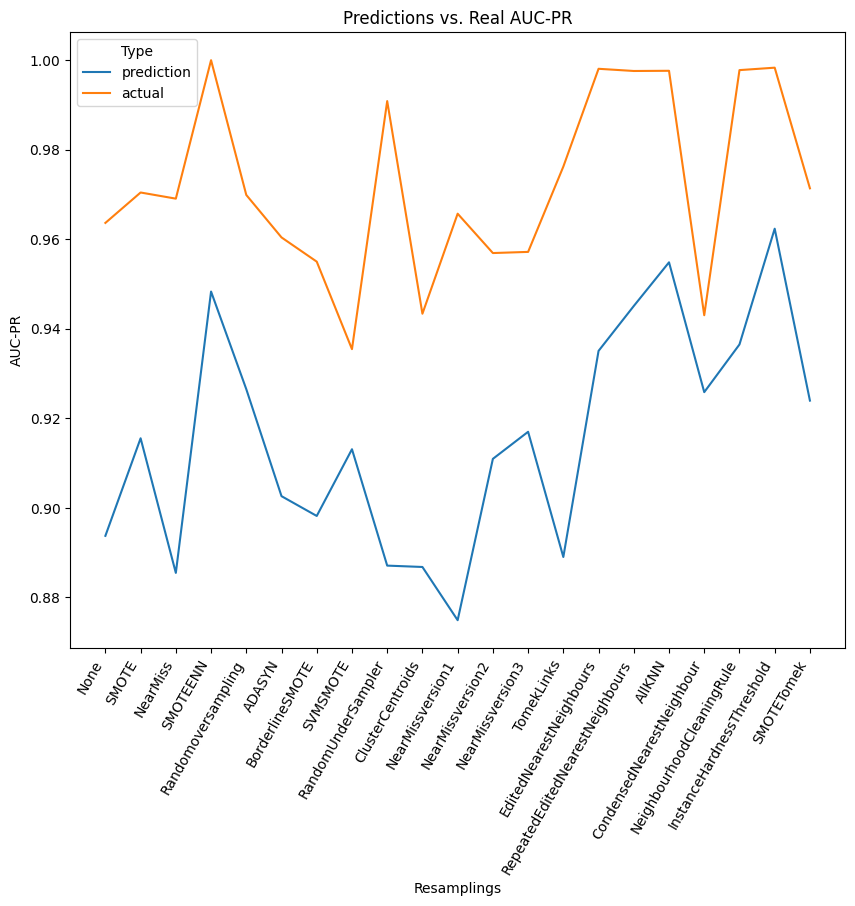

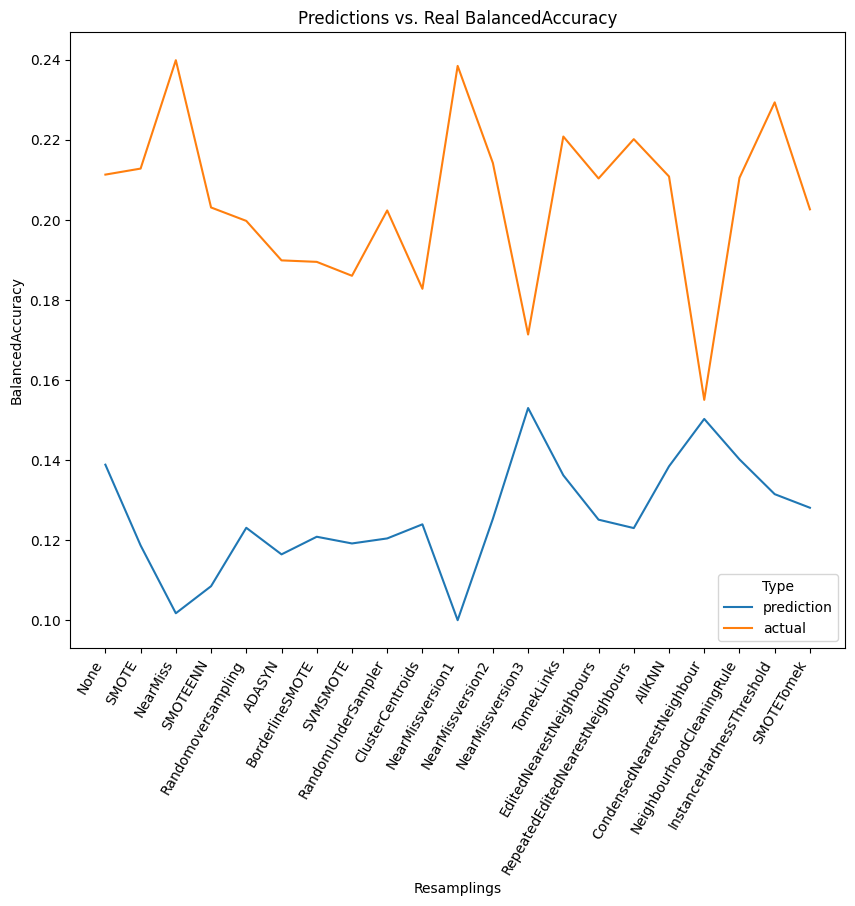

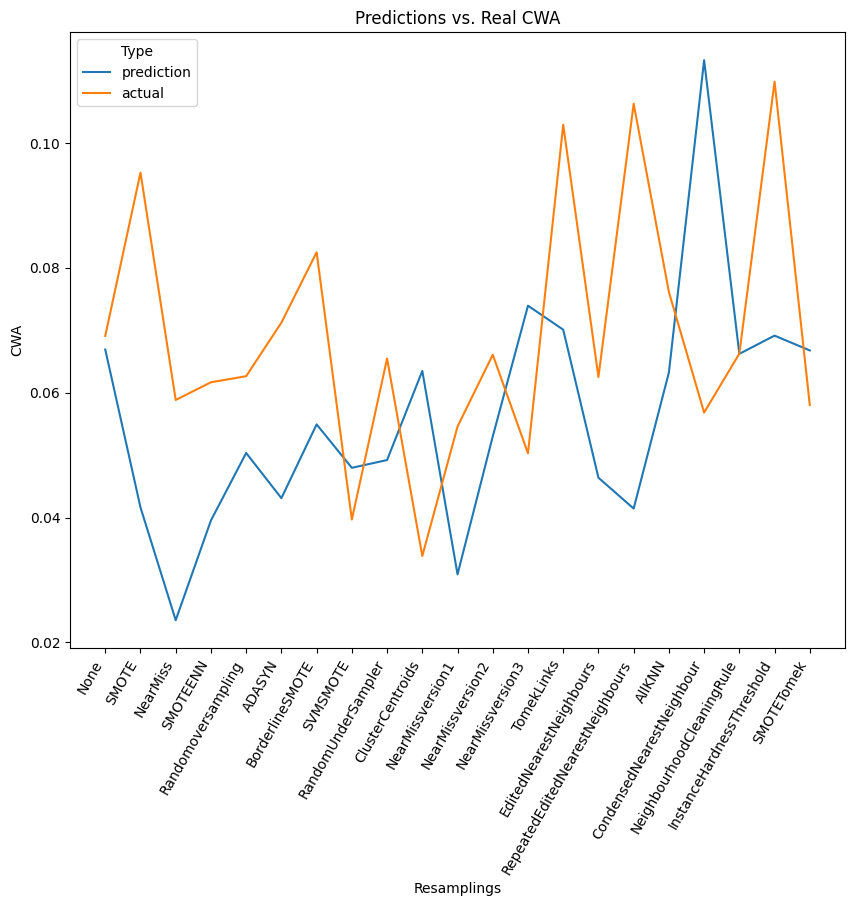

In [5]:
metrics = ['F1','G-mean','Accuracy','Precision','Recall','AUC-ROC','AUC-PR','BalancedAccuracy','CWA']
Classifier = 'SVM'
for metric in metrics:
    predictions = results_df[(results_df['Classifier'] == Classifier)&(results_df['Metric'] == metric)]['Predictions']
    actual = results_df[(results_df['Classifier'] == Classifier)&(results_df['Metric'] == metric)]['Actual']
    plt.figure(figsize=(10, 8))
    plt.plot(resamplings,predictions,label = 'prediction')
    plt.plot(resamplings,actual,label = 'actual')
    plt.title('Predictions vs. Real' + ' ' + metric)
    plt.xlabel('Resamplings')
    plt.ylabel(metric)
    plt.legend(title='Type')
    plt.xticks(rotation=60,fontsize=10,ha='right')
    # plt.tight_layout()
    plt.show()

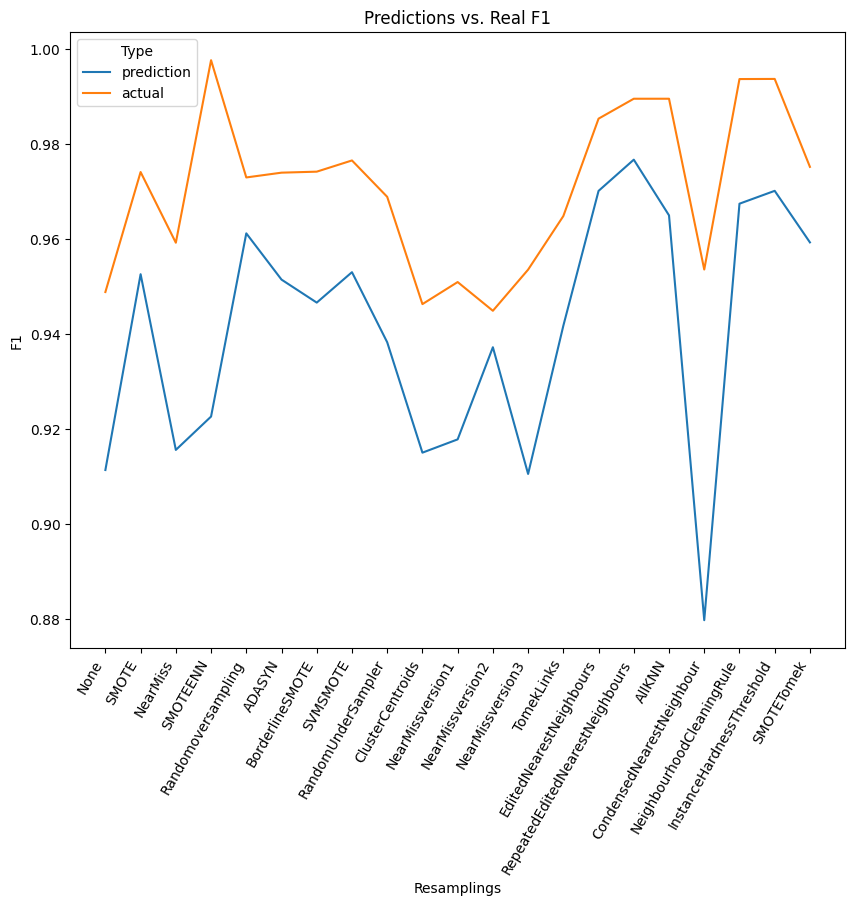

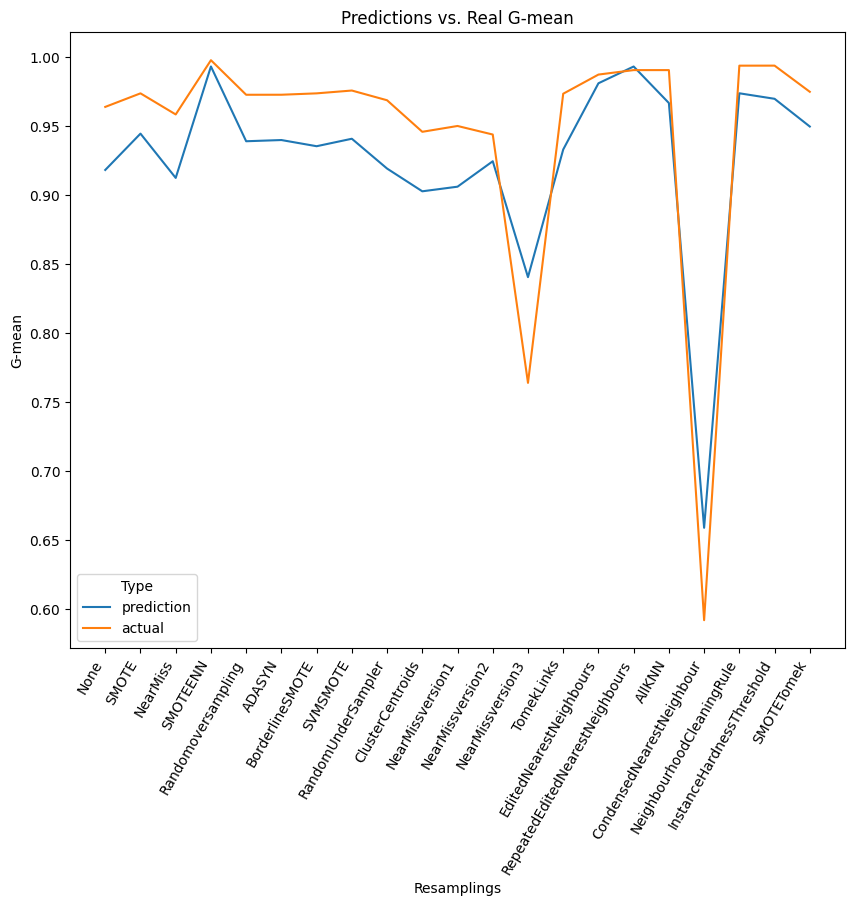

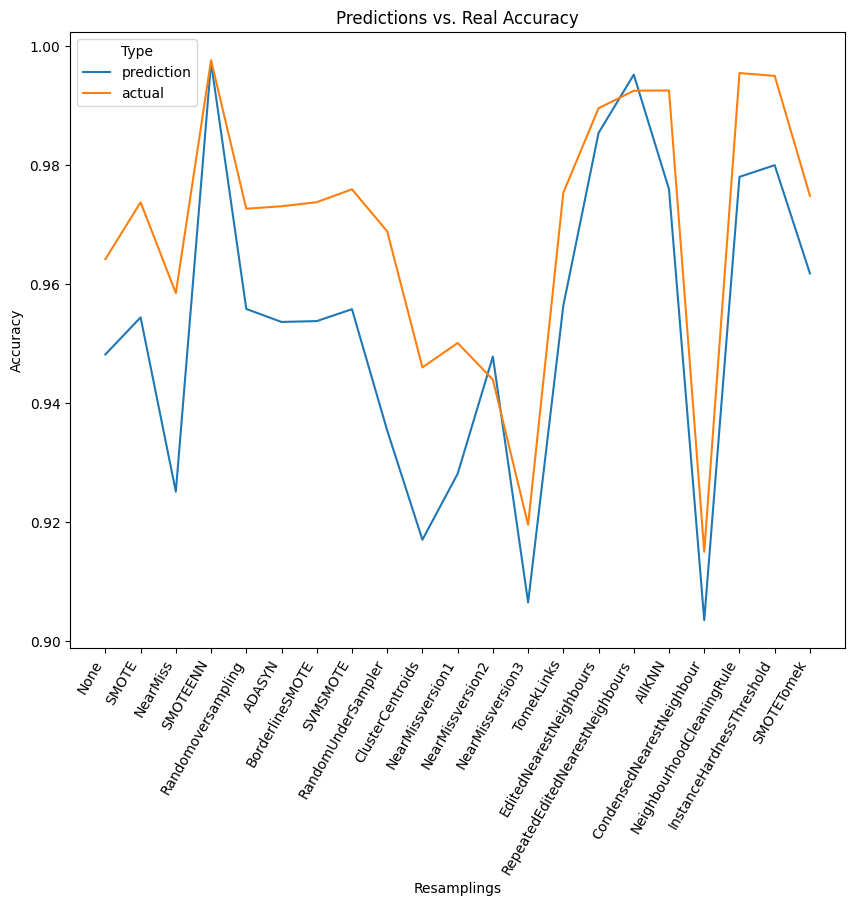

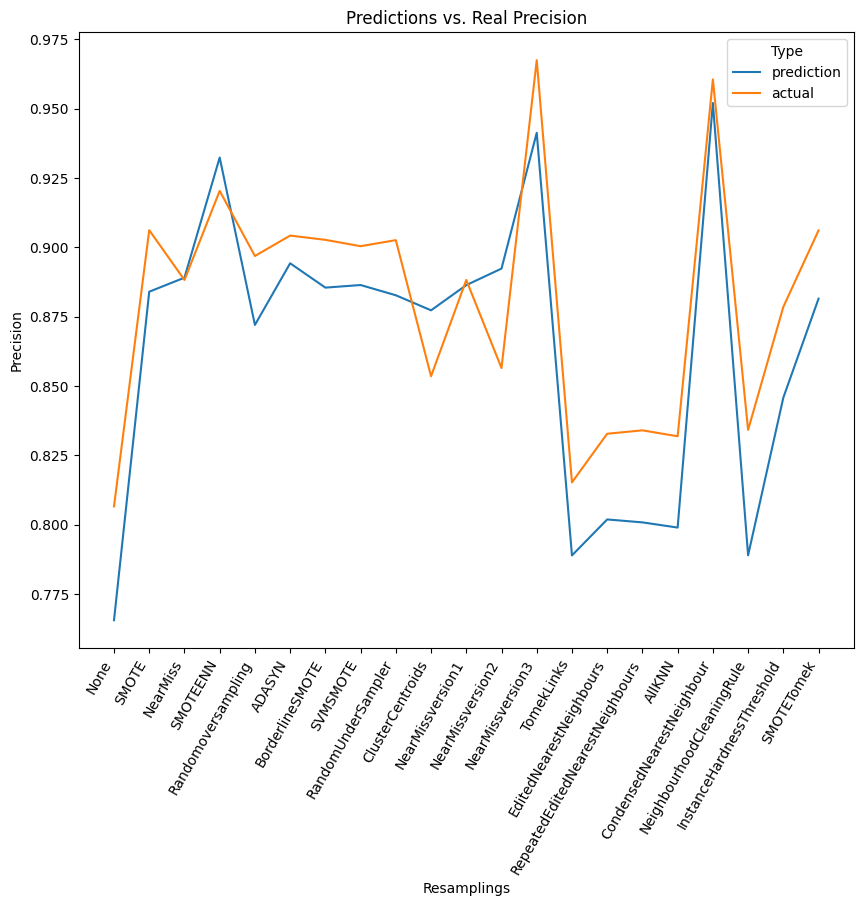

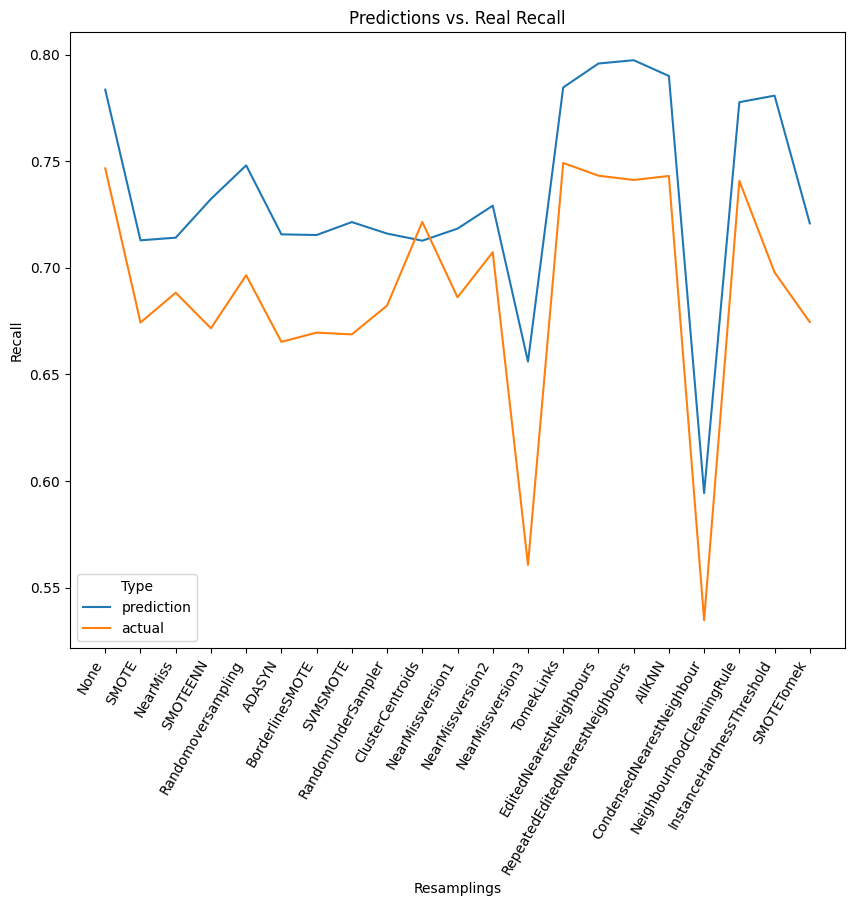

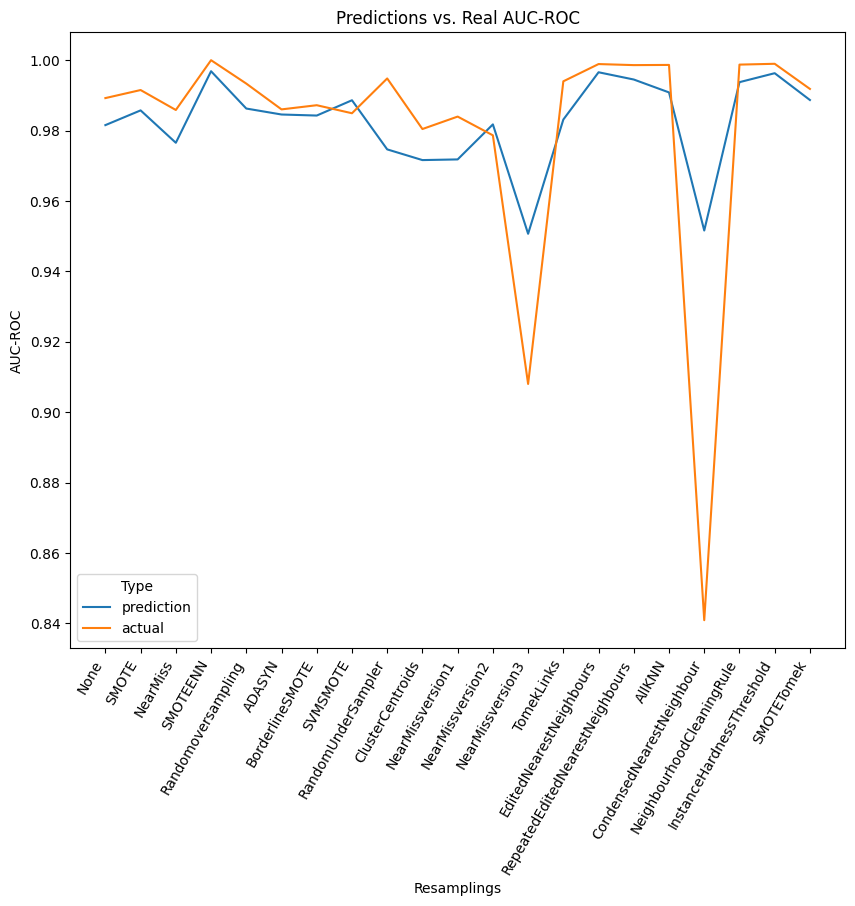

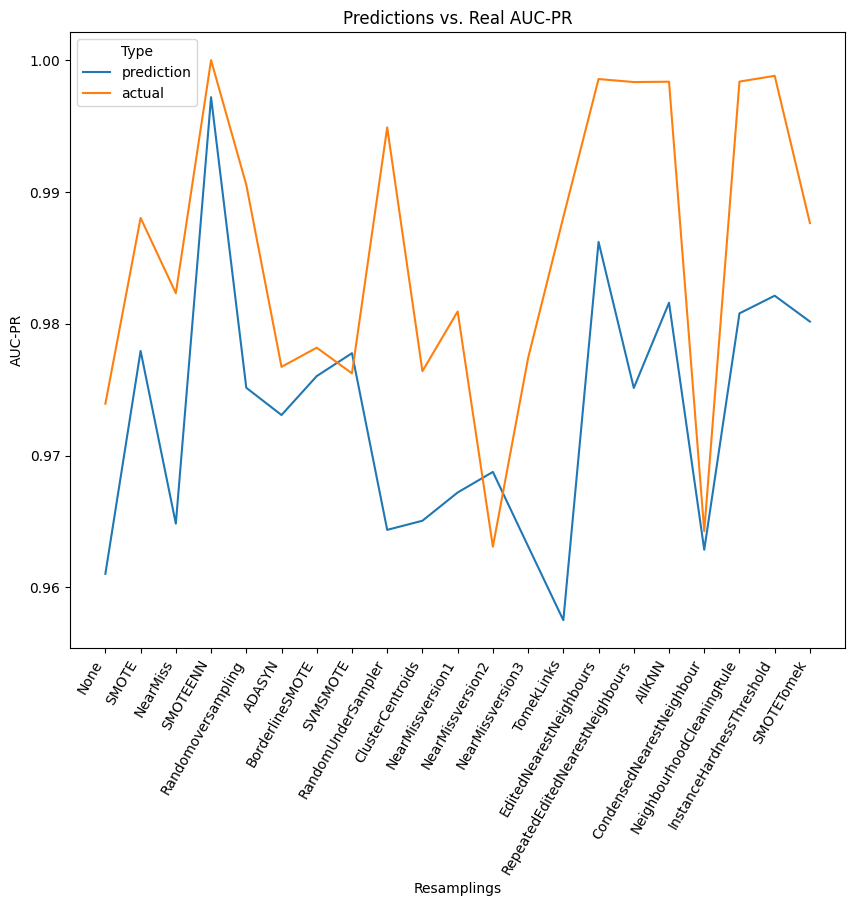

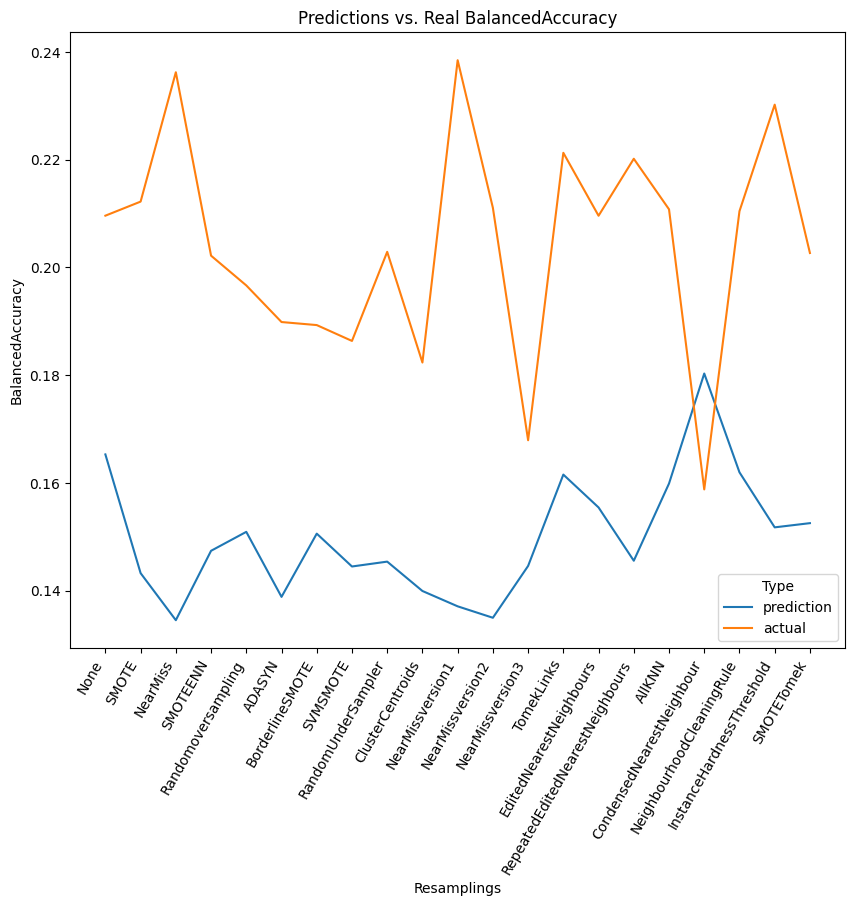

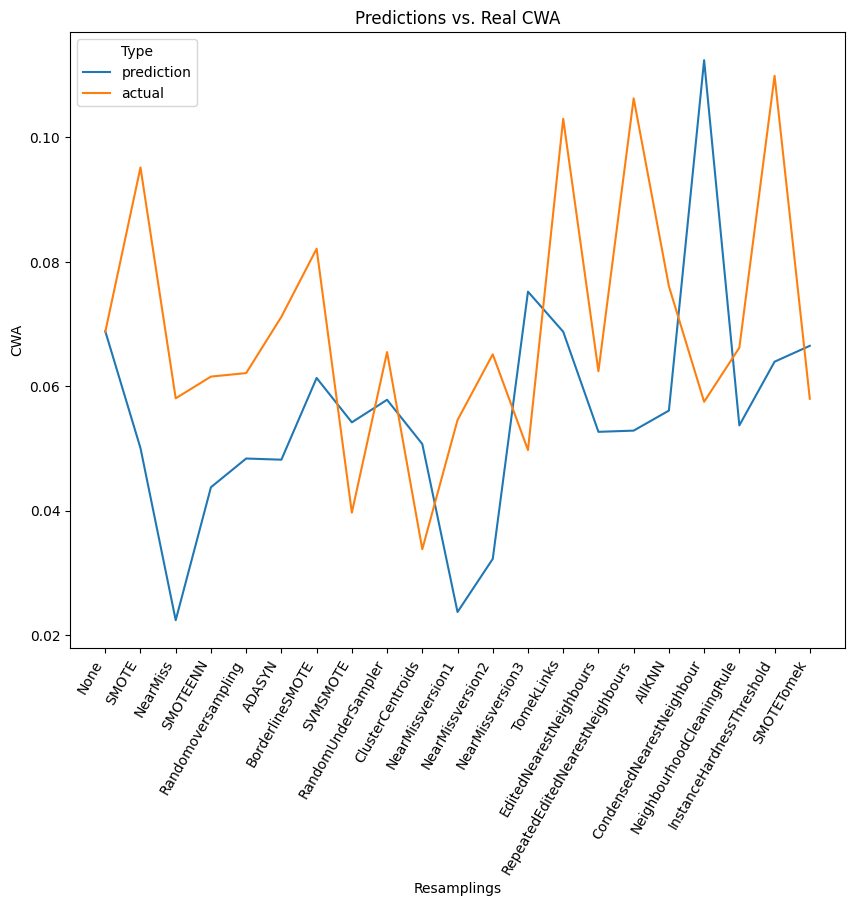

In [5]:
metrics = ['F1','G-mean','Accuracy','Precision','Recall','AUC-ROC','AUC-PR','BalancedAccuracy','CWA']
Classifier = 'CAT'
for metric in metrics:
    predictions = results_df[(results_df['Classifier'] == Classifier)&(results_df['Metric'] == metric)]['Predictions']
    actual = results_df[(results_df['Classifier'] == Classifier)&(results_df['Metric'] == metric)]['Actual']
    plt.figure(figsize=(10, 8))
    plt.plot(resamplings,predictions,label = 'prediction')
    plt.plot(resamplings,actual,label = 'actual')
    plt.title('Predictions vs. Real' + ' ' + metric)
    plt.xlabel('Resamplings')
    plt.ylabel(metric)
    plt.legend(title='Type')
    plt.xticks(rotation=60,fontsize=10,ha='right')
    # plt.tight_layout()
    plt.show()

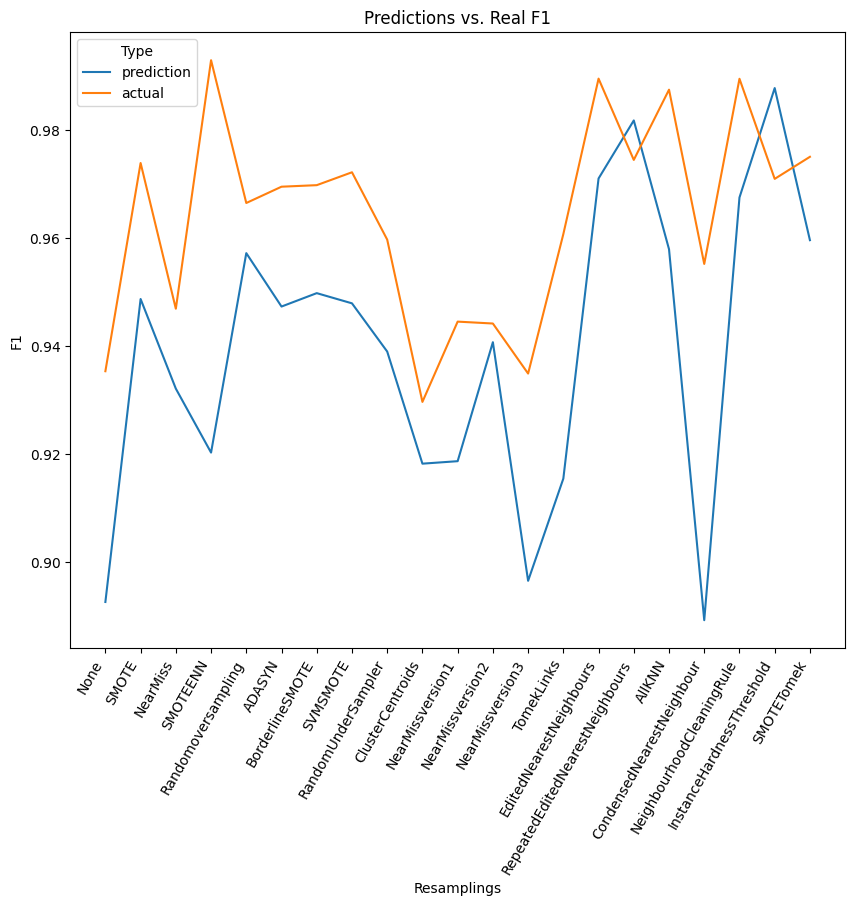

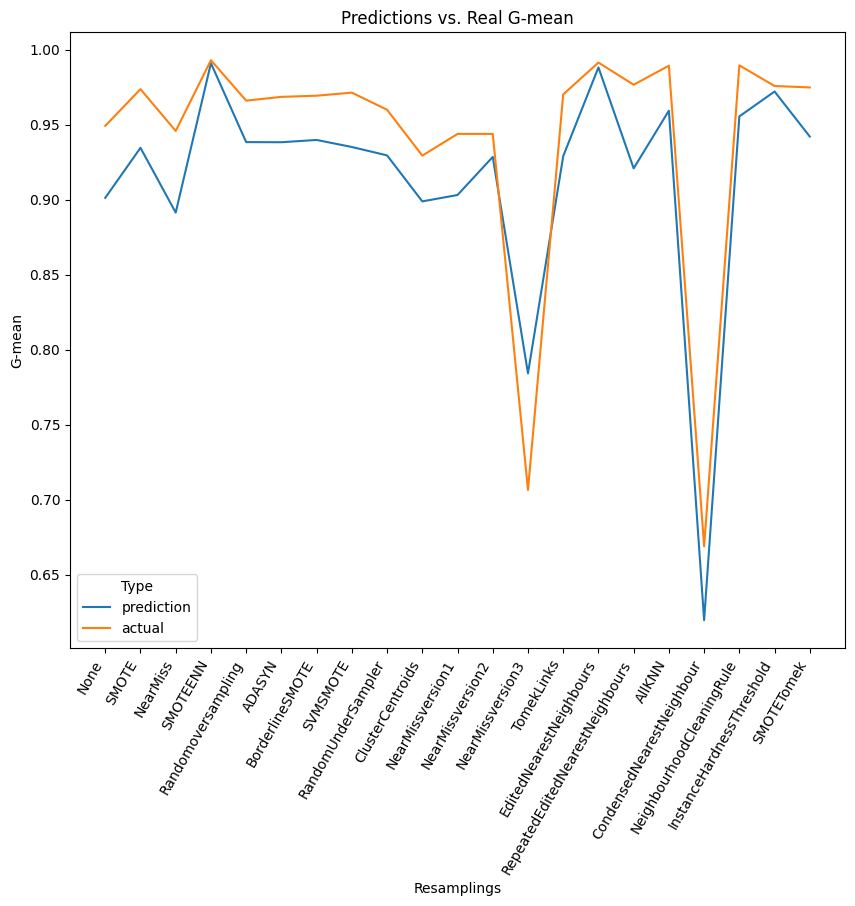

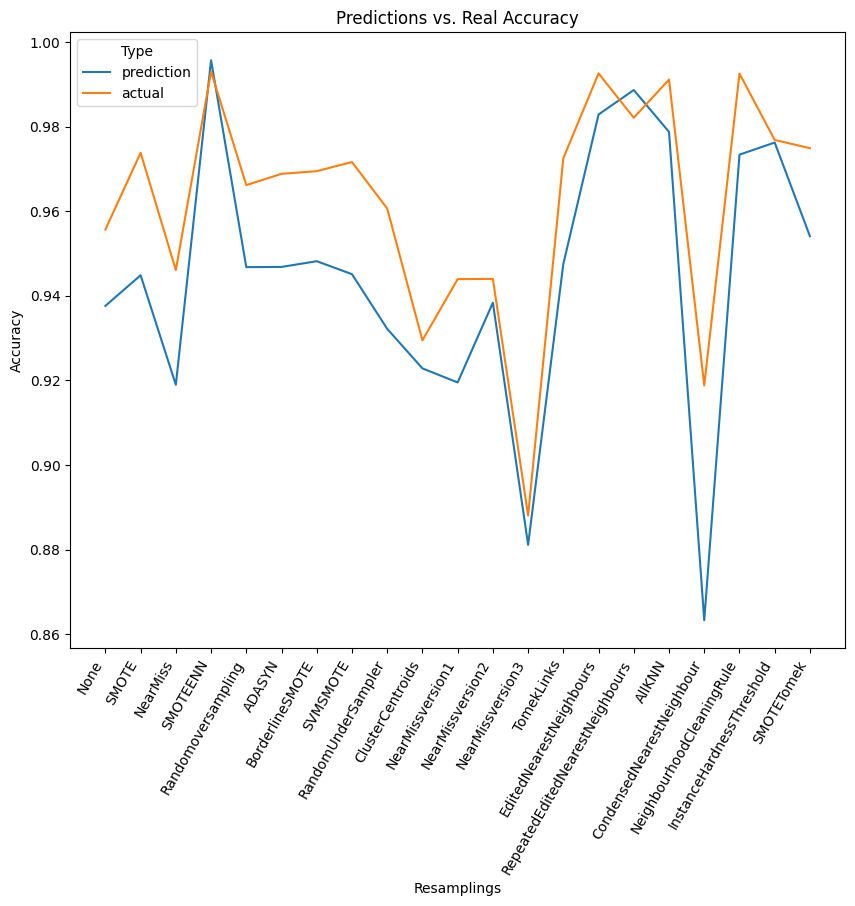

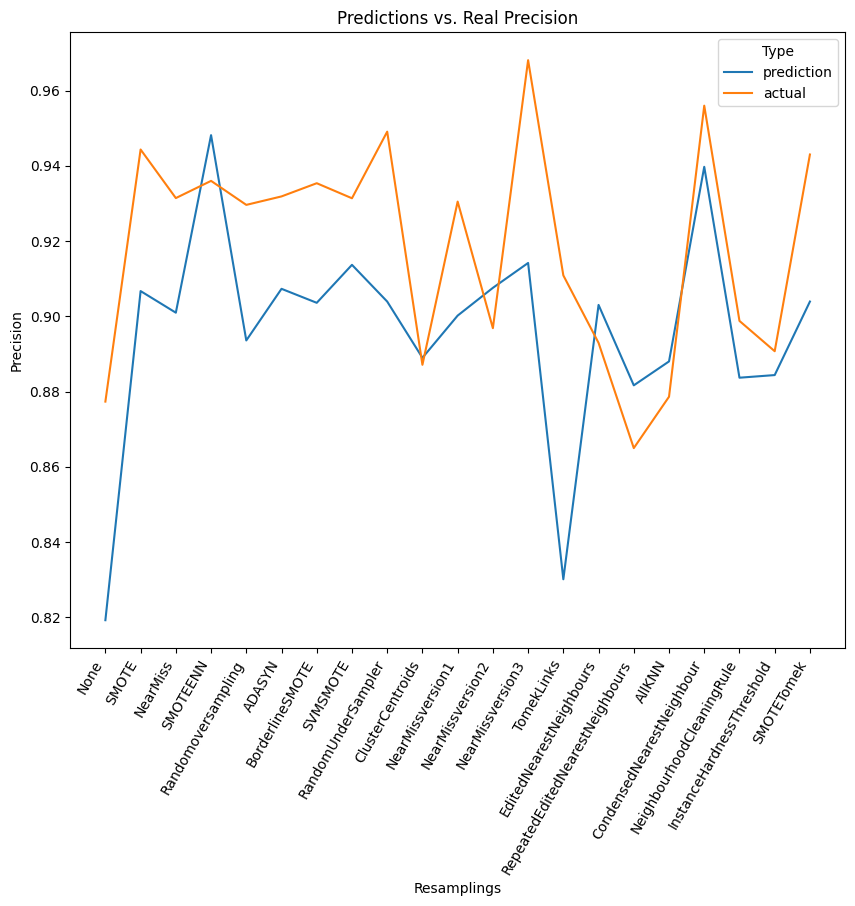

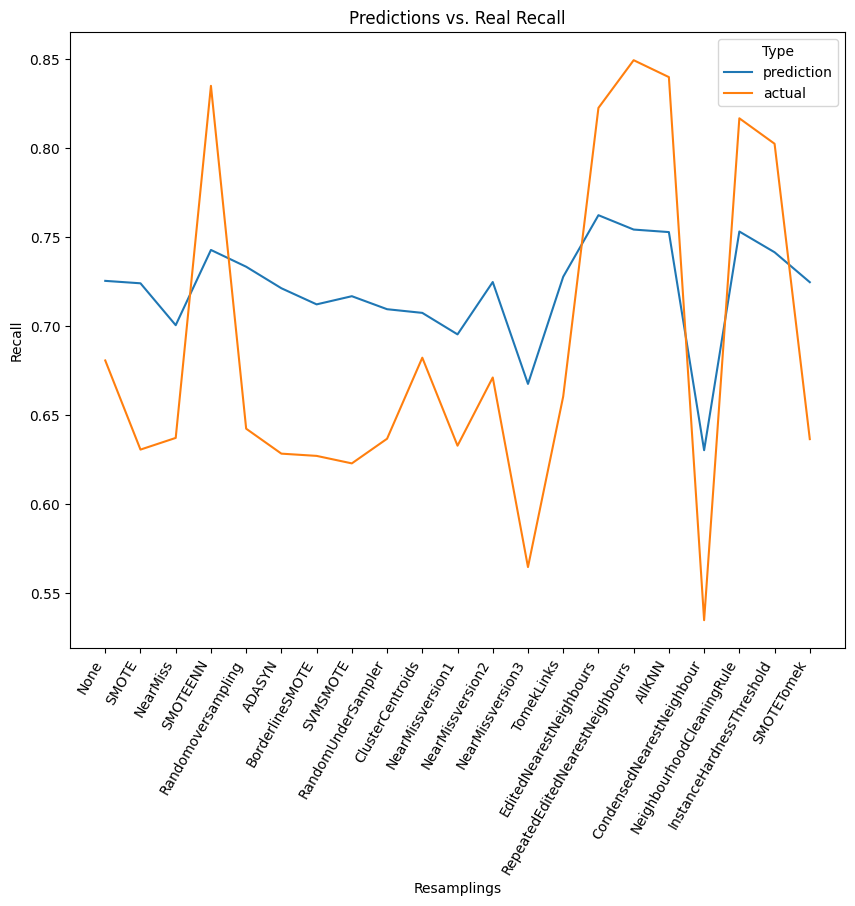

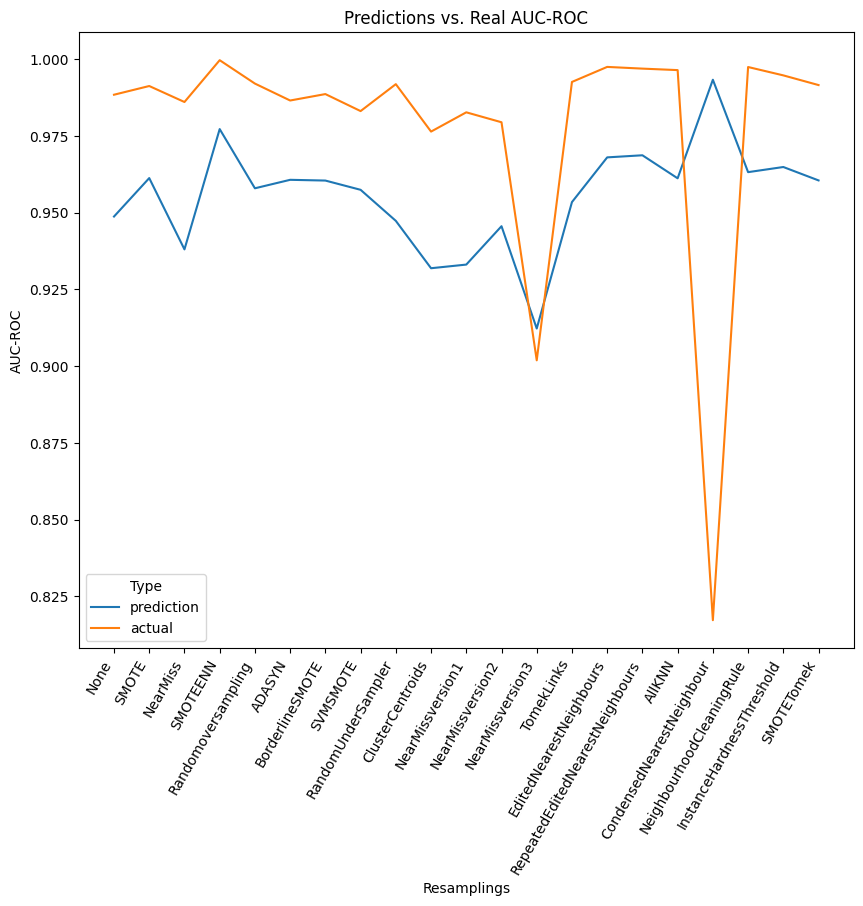

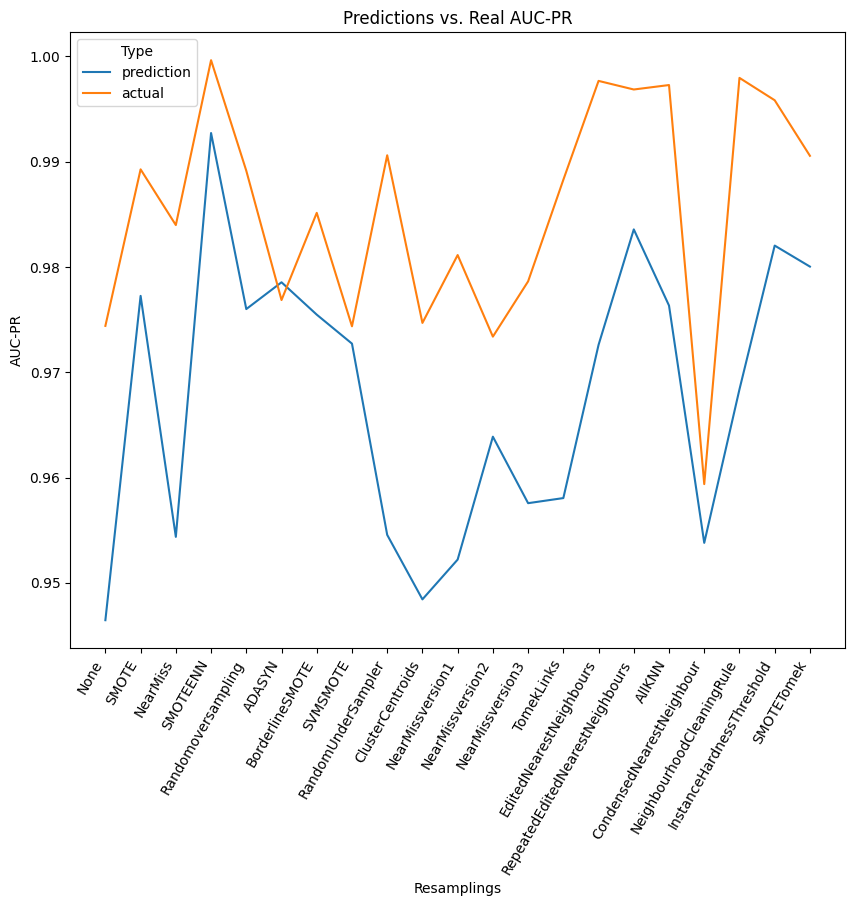

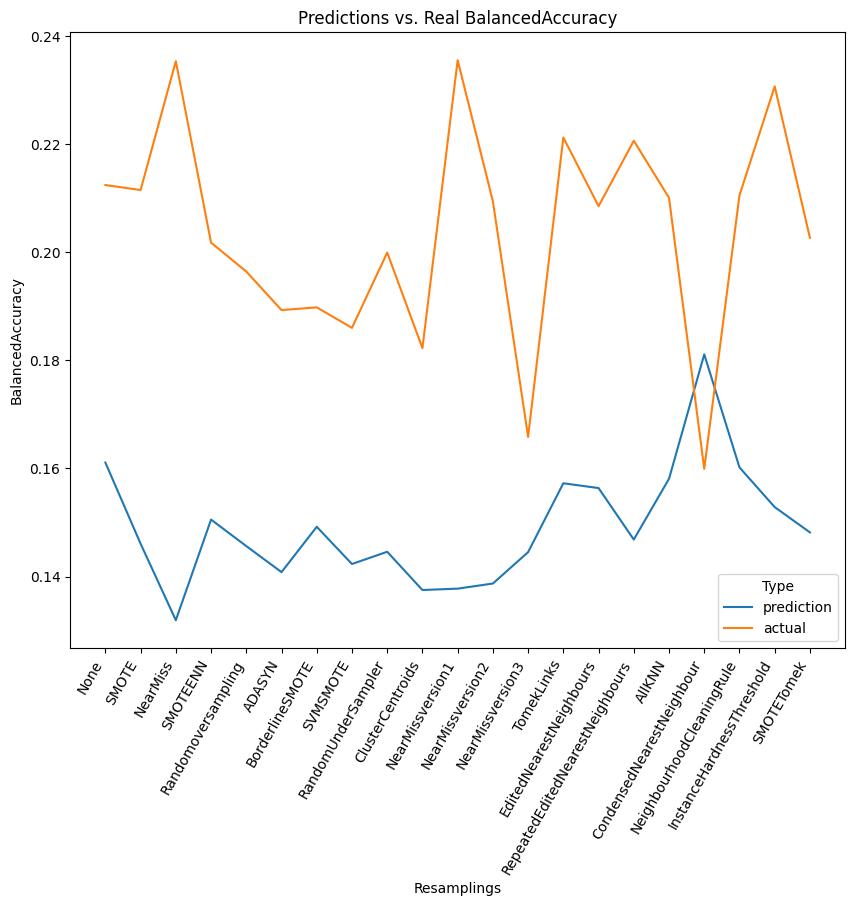

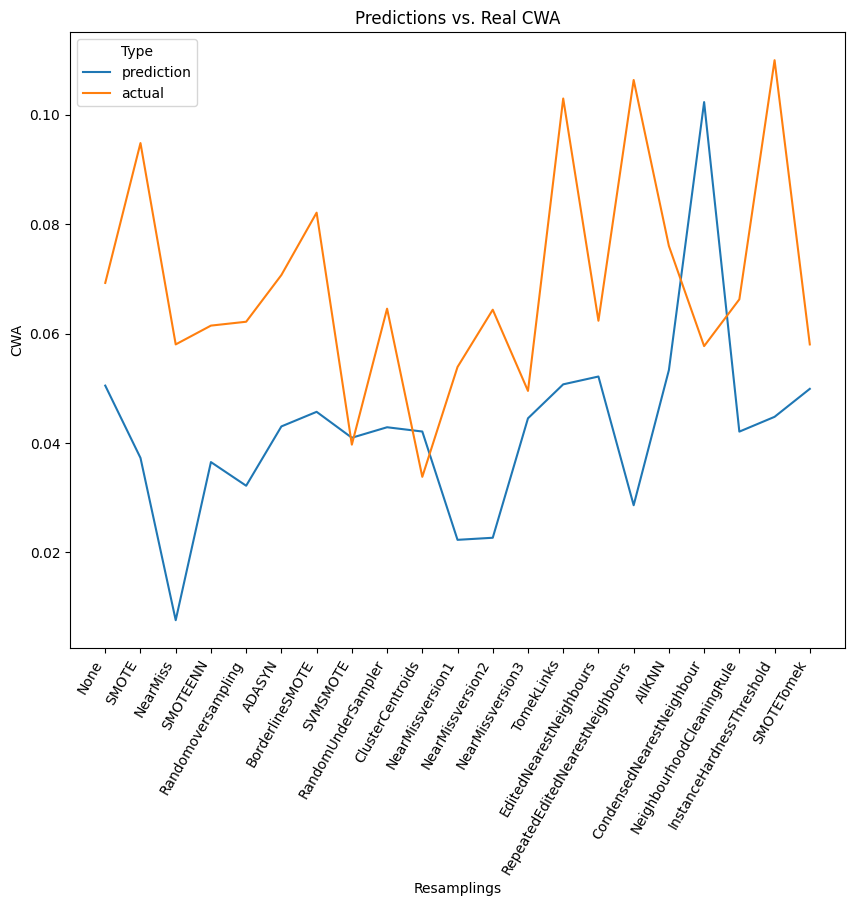

In [6]:
metrics = ['F1','G-mean','Accuracy','Precision','Recall','AUC-ROC','AUC-PR','BalancedAccuracy','CWA']
Classifier = 'GB'
for metric in metrics:
    predictions = results_df[(results_df['Classifier'] == Classifier)&(results_df['Metric'] == metric)]['Predictions']
    actual = results_df[(results_df['Classifier'] == Classifier)&(results_df['Metric'] == metric)]['Actual']
    plt.figure(figsize=(10, 8))
    plt.plot(resamplings,predictions,label = 'prediction')
    plt.plot(resamplings,actual,label = 'actual')
    plt.title('Predictions vs. Real' + ' ' + metric)
    plt.xlabel('Resamplings')
    plt.ylabel(metric)
    plt.legend(title='Type')
    plt.xticks(rotation=60,fontsize=10,ha='right')
    # plt.tight_layout()
    plt.show()

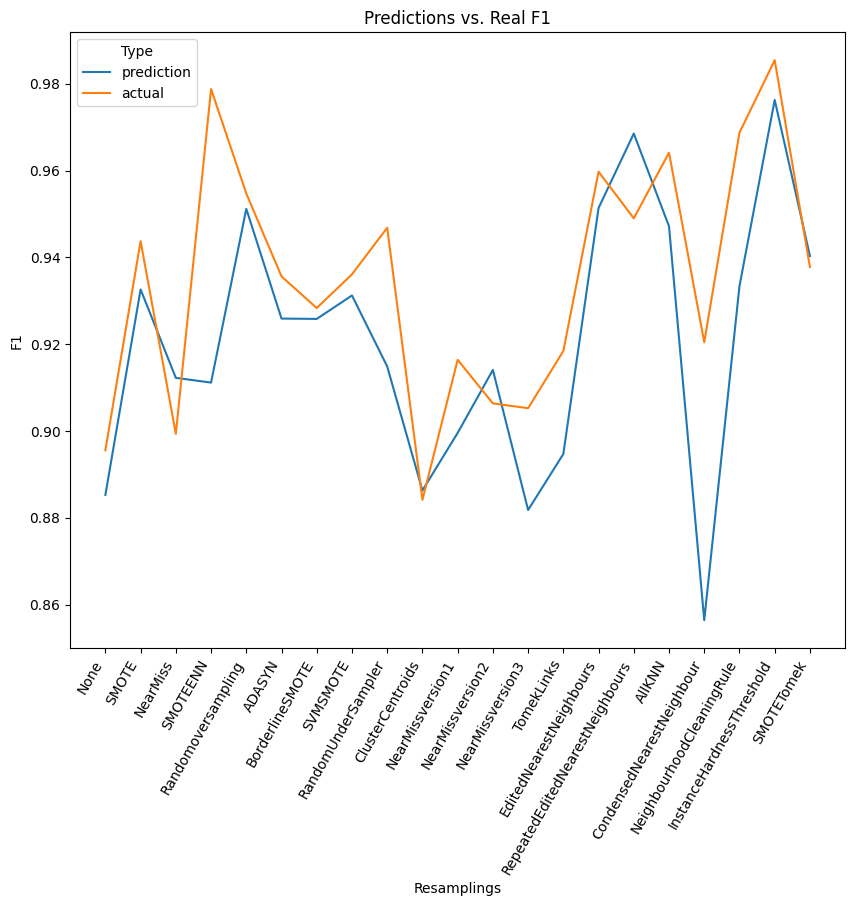

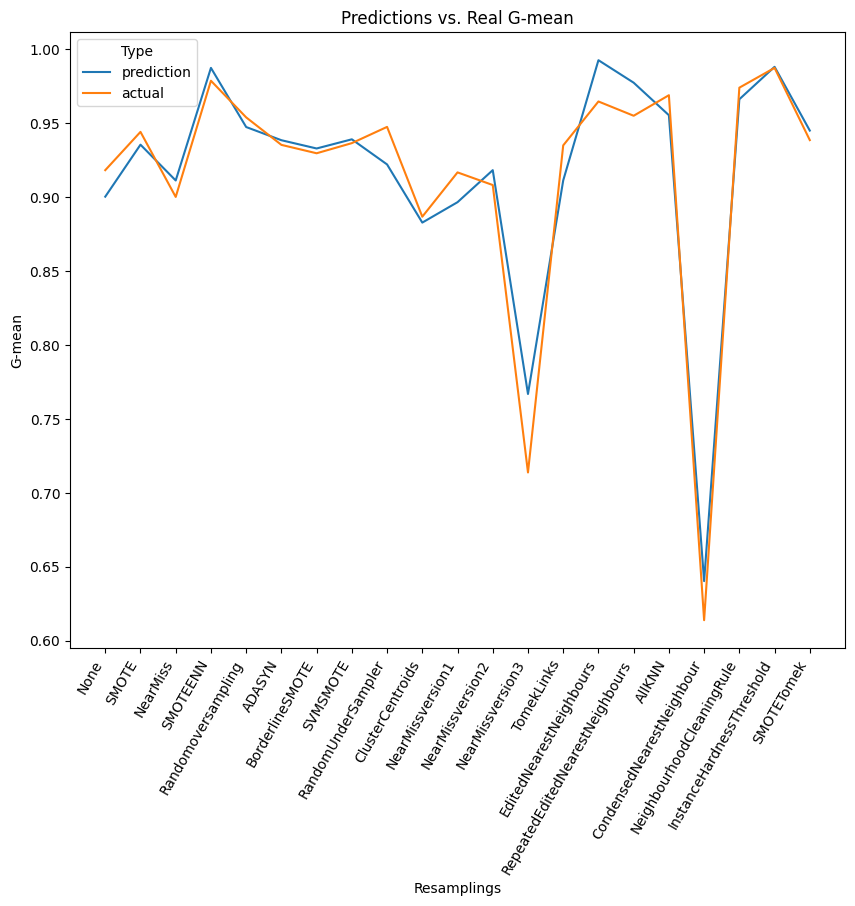

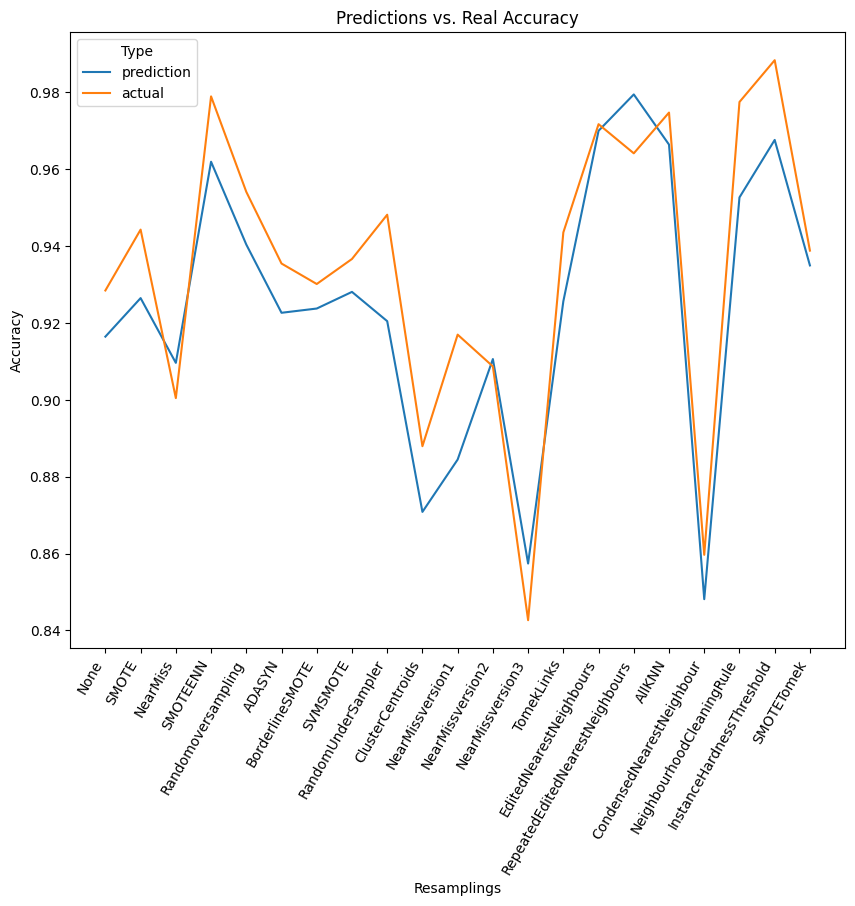

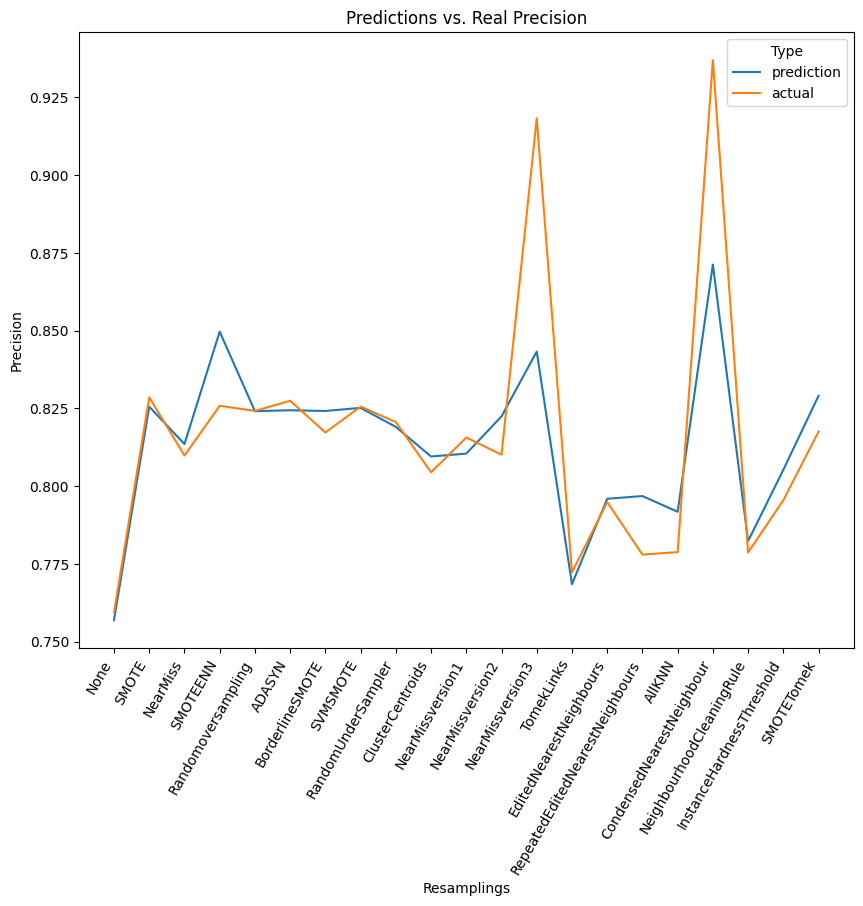

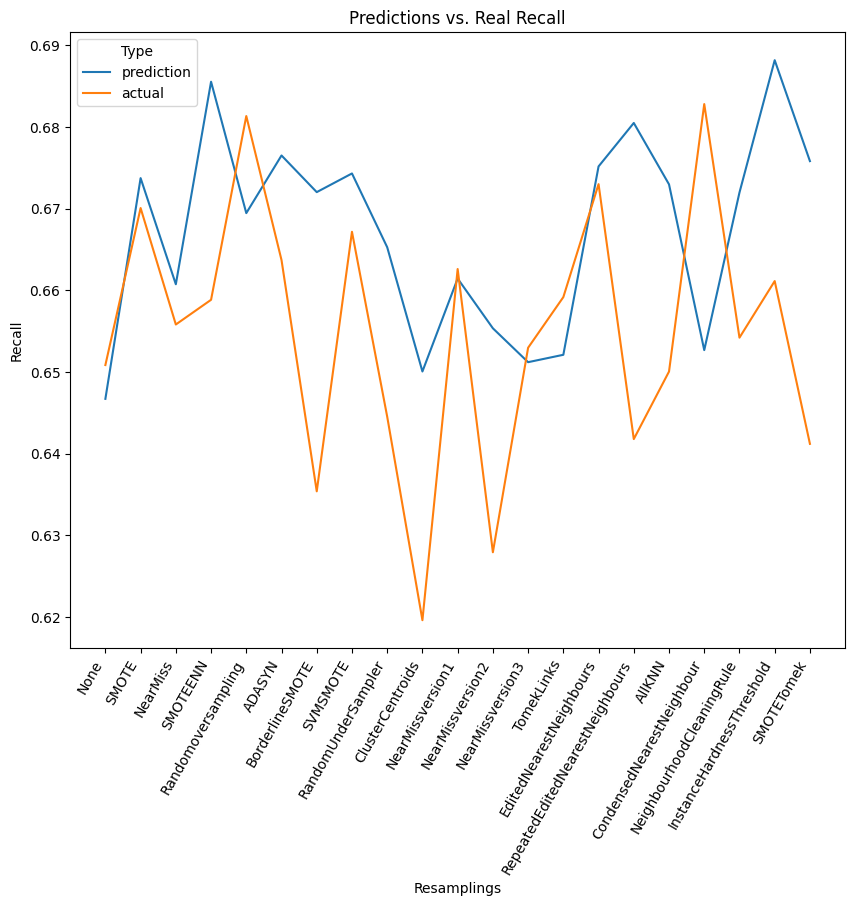

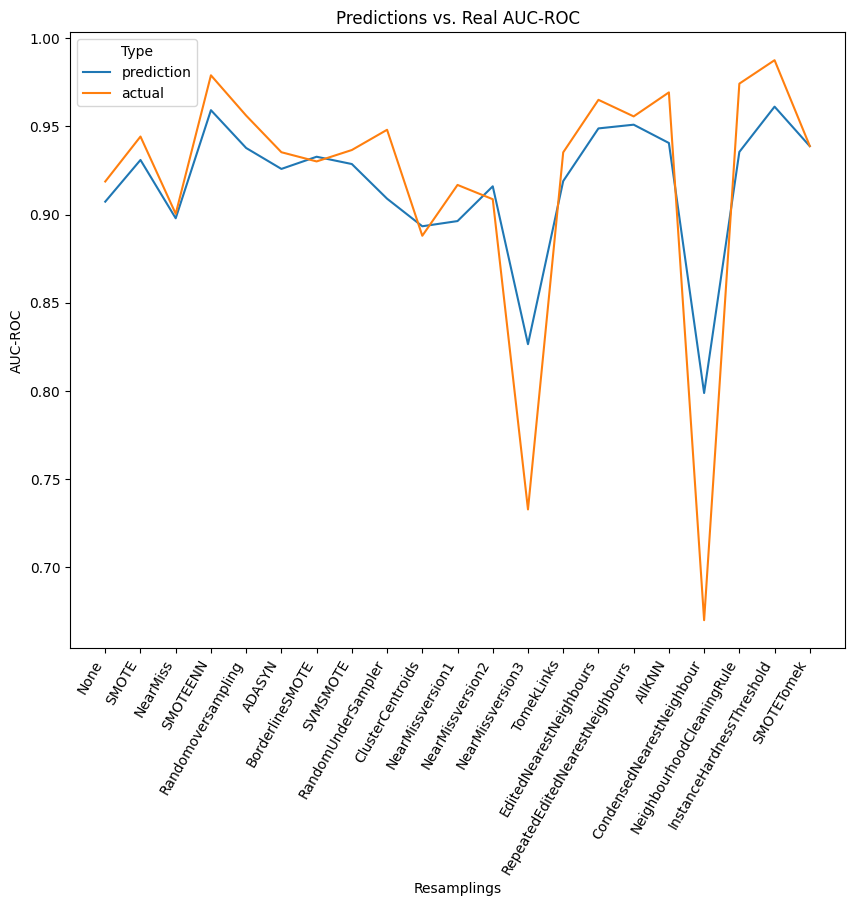

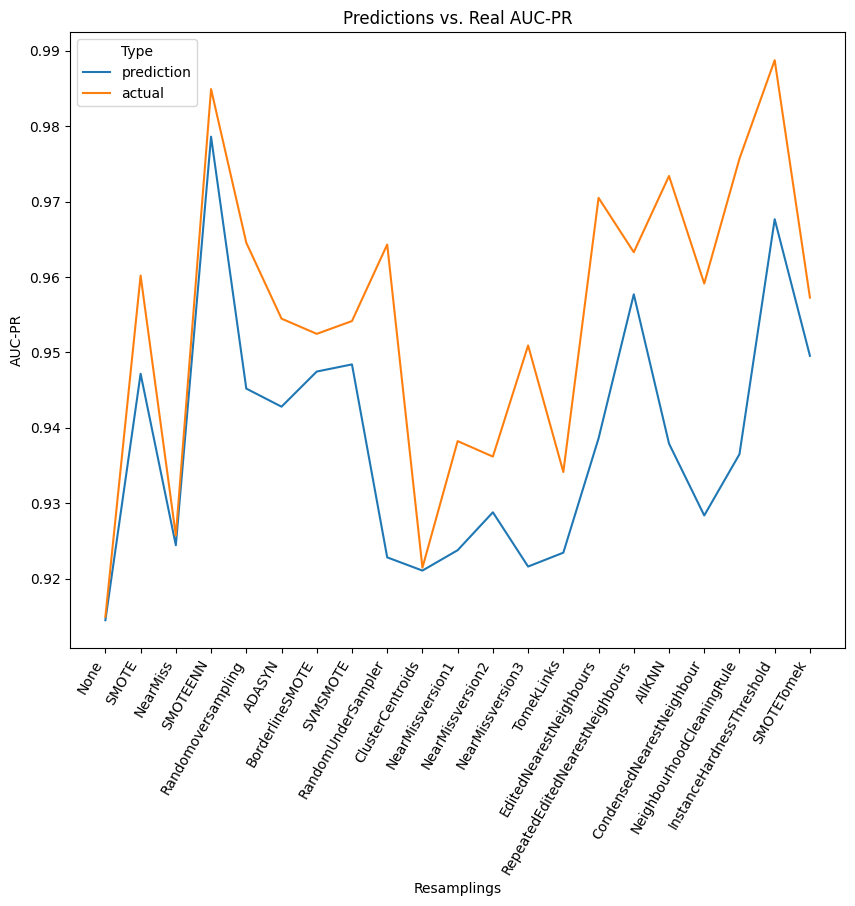

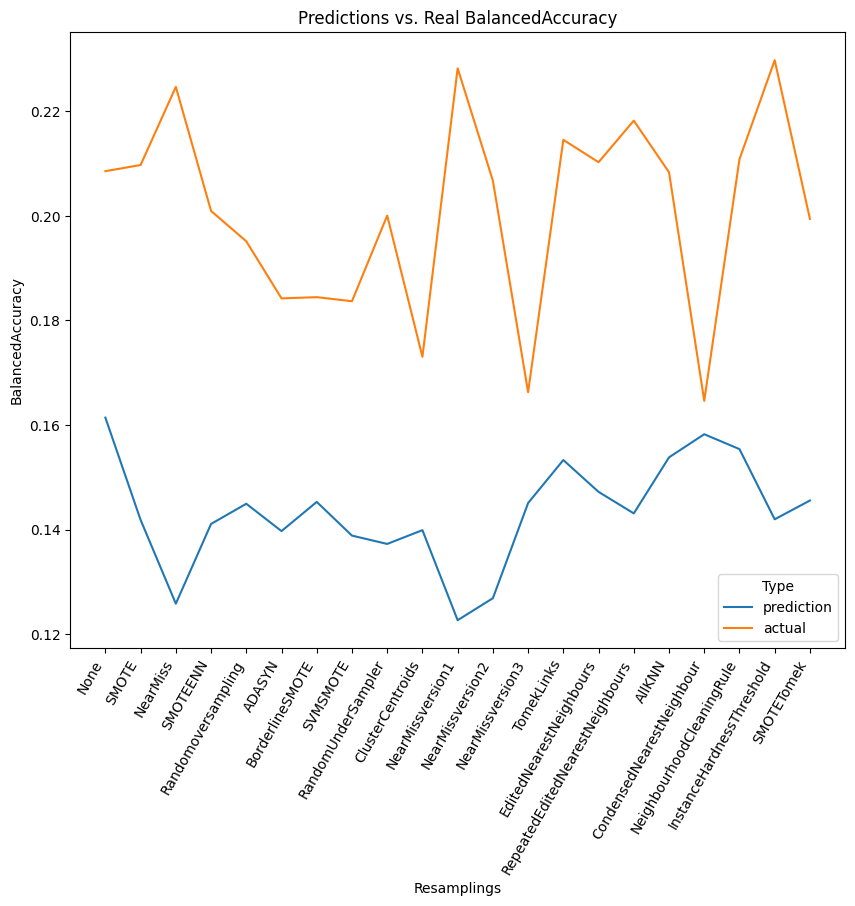

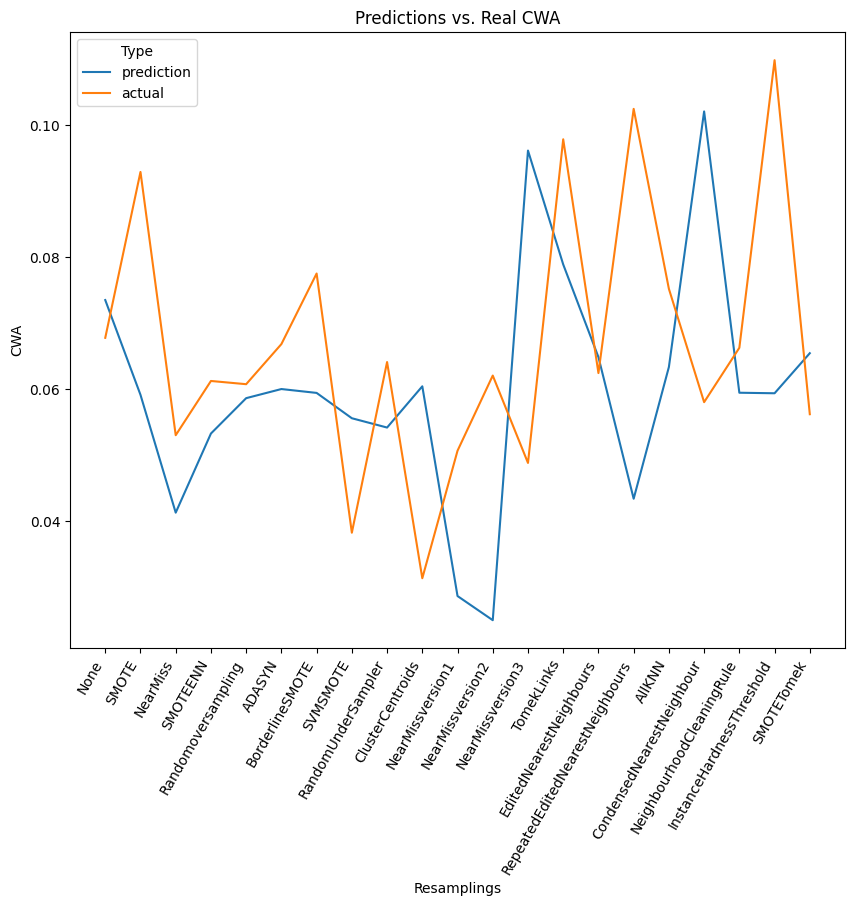

In [7]:
metrics = ['F1','G-mean','Accuracy','Precision','Recall','AUC-ROC','AUC-PR','BalancedAccuracy','CWA']
Classifier = 'DT'
for metric in metrics:
    predictions = results_df[(results_df['Classifier'] == Classifier)&(results_df['Metric'] == metric)]['Predictions']
    actual = results_df[(results_df['Classifier'] == Classifier)&(results_df['Metric'] == metric)]['Actual']
    plt.figure(figsize=(10, 8))
    plt.plot(resamplings,predictions,label = 'prediction')
    plt.plot(resamplings,actual,label = 'actual')
    plt.title('Predictions vs. Real' + ' ' + metric)
    plt.xlabel('Resamplings')
    plt.ylabel(metric)
    plt.legend(title='Type')
    plt.xticks(rotation=60,fontsize=10,ha='right')
    # plt.tight_layout()
    plt.show()